In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import json
import os
import numpy as np
import plotly.io as pio

In [2]:
df = pd.read_excel('Population_by regions_UK_2000 to 2020.xlsx')

Text(0.5, 1.0, 'Population in Wales (2000-2020)')

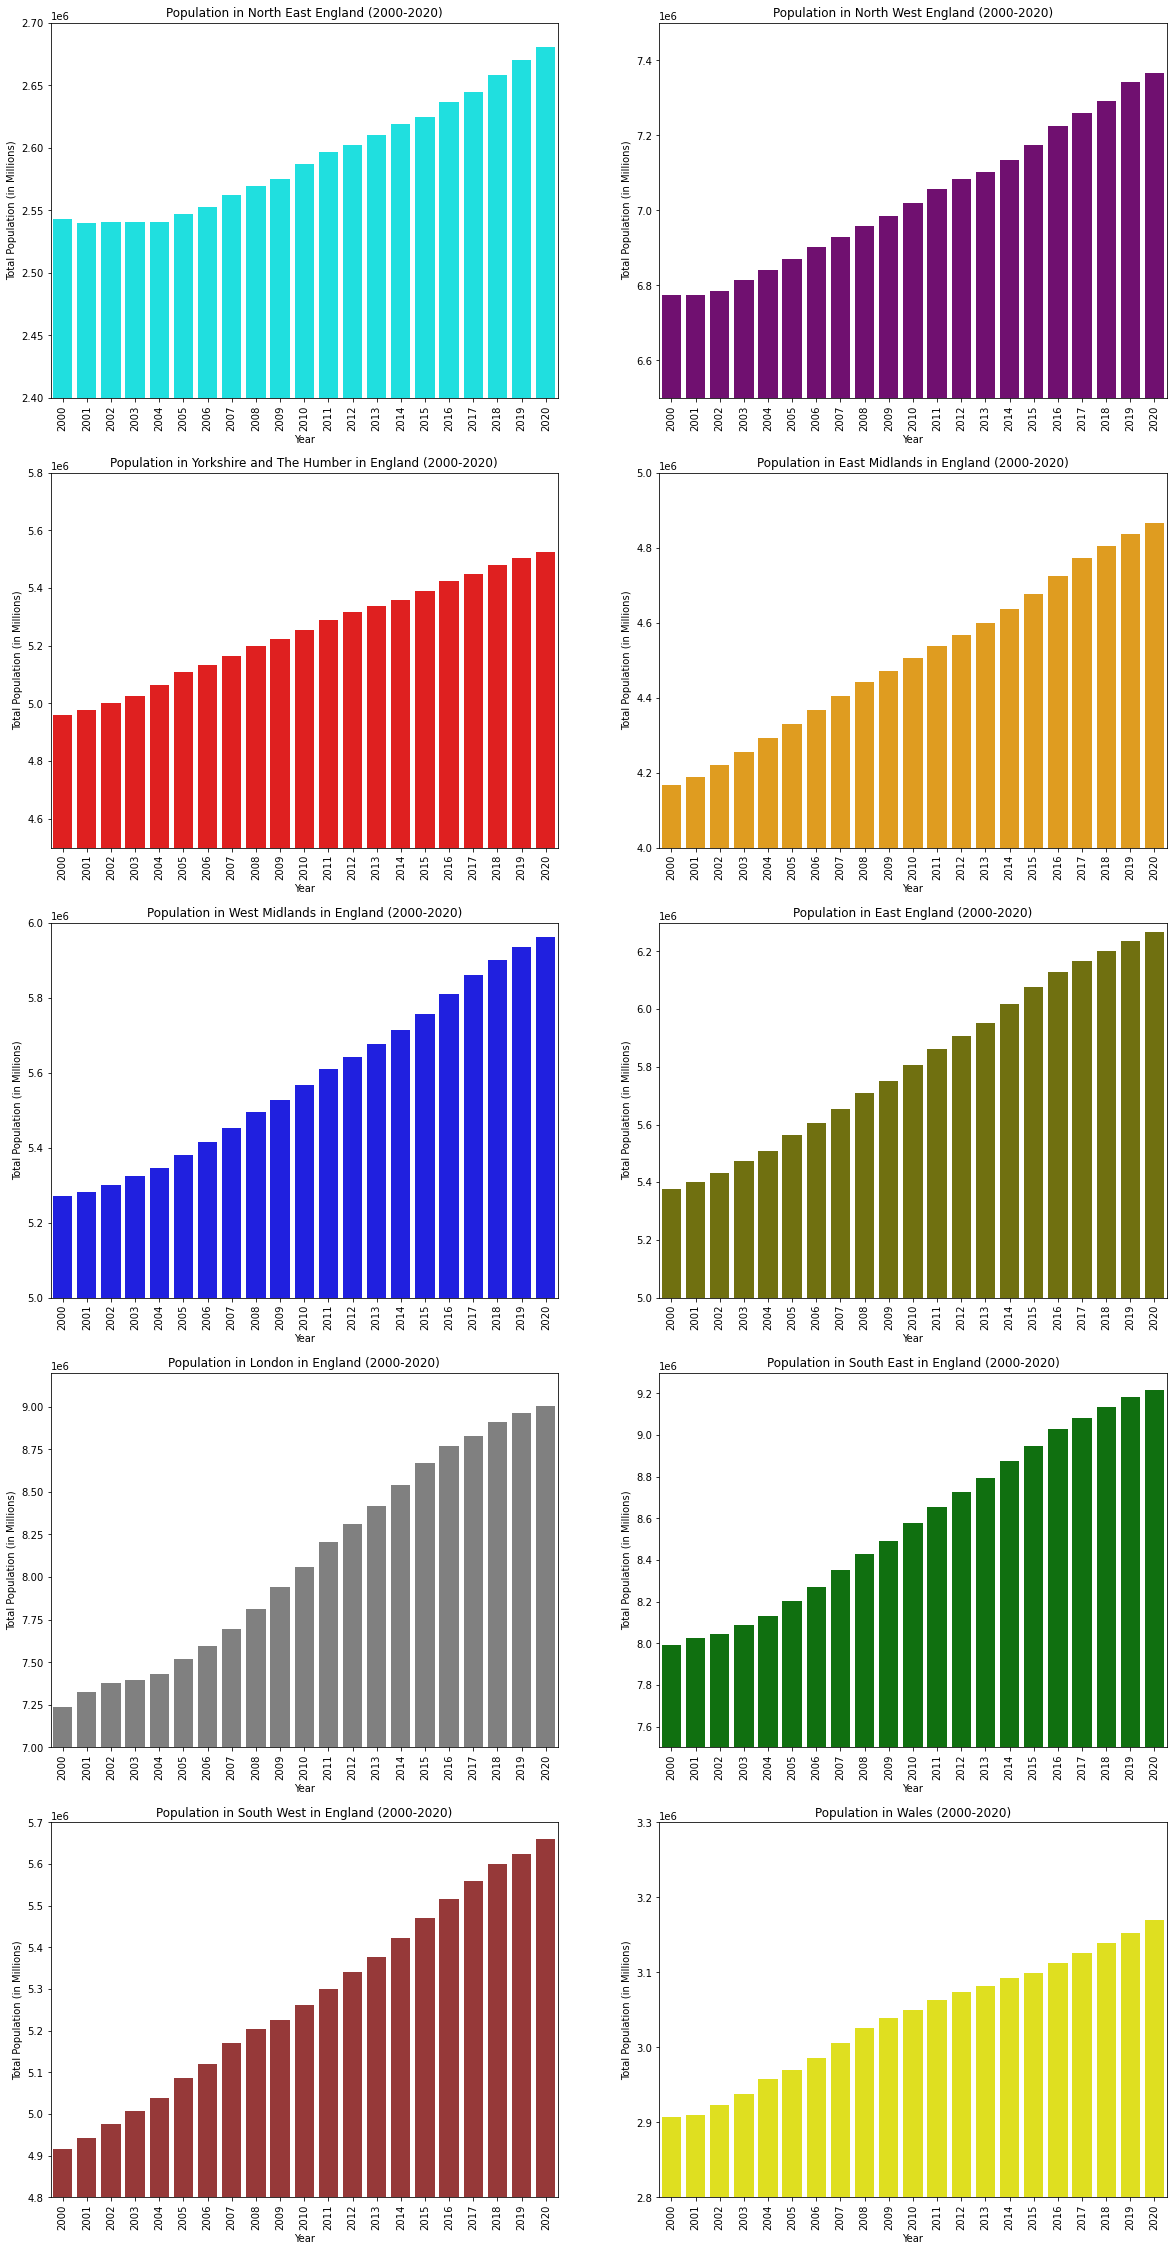

In [3]:
fig, ax = plt.subplots(5,2, figsize=(20,40))

North_East = df.loc[df['Region_Name']=='North East']
fig1= sns.barplot(x=North_East['Year'], y=North_East['Total_population'], ax=ax[0,0], color = 'Cyan')
fig1.set_xticklabels(labels = North_East['Year'], rotation=90)
fig1.set_ylabel(ylabel = 'Total Population (in Millions)')
fig1.set_ylim(2400000,2700000)
fig1.set_title('Population in North East England (2000-2020)')

North_West = df.loc[df['Region_Name']=='North West']
fig2 = sns.barplot(x=North_West['Year'], y=North_West['Total_population'], ax=ax[0,1], color = 'Purple')
fig2.set_xticklabels(labels = North_West['Year'], rotation=90)
fig2.set_ylabel(ylabel = 'Total Population (in Millions)')
fig2.set_ylim(6500000,7500000)
fig2.set_title('Population in North West England (2000-2020)')

Yorkshire= df.loc[df['Region_Name']=='Yorkshire and The Humber']
fig3 = sns.barplot(x=Yorkshire['Year'], y=Yorkshire['Total_population'], ax=ax[1,0], color = 'Red')
fig3.set_xticklabels(labels = Yorkshire['Year'], rotation=90)
fig3.set_ylabel(ylabel = 'Total Population (in Millions)')
fig3.set_ylim(4500000,5800000)
fig3.set_title('Population in Yorkshire and The Humber in England (2000-2020)')

East_Midlands= df.loc[df['Region_Name']=='East Midlands']
fig4 = sns.barplot(x=East_Midlands['Year'], y=East_Midlands['Total_population'], ax=ax[1,1], color = 'Orange')
fig4.set_xticklabels(labels = East_Midlands['Year'], rotation=90)
fig4.set_ylabel(ylabel = 'Total Population (in Millions)')
fig4.set_ylim(4000000,5000000)
fig4.set_title('Population in East Midlands in England (2000-2020)')

West_Midlands= df.loc[df['Region_Name']=='West Midlands']
fig5 = sns.barplot(x=West_Midlands['Year'], y=West_Midlands['Total_population'], ax=ax[2,0], color = 'Blue')
fig5.set_xticklabels(labels = West_Midlands['Year'], rotation=90)
fig5.set_ylabel(ylabel = 'Total Population (in Millions)')
fig5.set_ylim(5000000,6000000)
fig5.set_title('Population in West Midlands in England (2000-2020)')

East= df.loc[df['Region_Name']=='East']
fig6 = sns.barplot(x=East['Year'], y=East['Total_population'], ax=ax[2,1], color = 'Olive')
fig6.set_xticklabels(labels = East['Year'], rotation=90)
fig6.set_ylabel(ylabel = 'Total Population (in Millions)')
fig6.set_ylim(5000000,6300000)
fig6.set_title('Population in East England (2000-2020)')

London= df.loc[df['Region_Name']=='London']
fig7 = sns.barplot(x=London['Year'], y=London['Total_population'], ax=ax[3,0], color = 'Gray')
fig7.set_xticklabels(labels = London['Year'], rotation=90)
fig7.set_ylabel(ylabel = 'Total Population (in Millions)')
fig7.set_ylim(7000000,9200000)
fig7.set_title('Population in London in England (2000-2020)')

South_East= df.loc[df['Region_Name']=='South East']
fig8 = sns.barplot(x=South_East['Year'], y=South_East['Total_population'], ax=ax[3,1], color = 'Green')
fig8.set_xticklabels(labels = South_East['Year'], rotation=90)
fig8.set_ylabel(ylabel = 'Total Population (in Millions)')
fig8.set_ylim(7500000,9300000)
fig8.set_title('Population in South East in England (2000-2020)')

South_West= df.loc[df['Region_Name']=='South West']
fig9 = sns.barplot(x=South_West['Year'], y=South_West['Total_population'], ax=ax[4,0], color = 'Brown')
fig9.set_xticklabels(labels = South_West['Year'], rotation=90)
fig9.set_ylabel(ylabel = 'Total Population (in Millions)')
fig9.set_ylim(4800000,5700000)
fig9.set_title('Population in South West in England (2000-2020)')

Wales= df.loc[df['Region_Name']=='Wales']
fig10 = sns.barplot(x=Wales['Year'], y=Wales['Total_population'], ax=ax[4,1], color = 'Yellow')
fig10.set_xticklabels(labels = Wales['Year'], rotation=90)
fig10.set_ylabel(ylabel = 'Total Population (in Millions)')
fig10.set_ylim(2800000,3300000)
fig10.set_title('Population in Wales (2000-2020)')

Text(0.5, 1.0, 'Box Plots of Population in English Regions (2000-2020)')

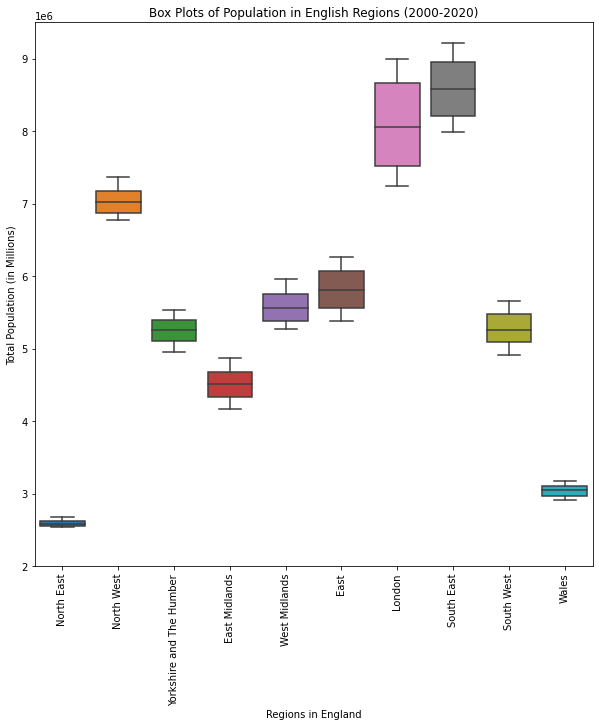

In [4]:
plt.subplots(figsize=(10,10))
fig= sns.boxplot(x=df['Region_Name'], y= df['Total_population'])
fig.set_xticklabels(labels = df['Region_Name'].unique(), rotation=90)
fig.set_ylim(2000000,9500000)
fig.set_xlabel('Regions in England')
fig.set_ylabel('Total Population (in Millions)')
fig.set_title('Box Plots of Population in English Regions (2000-2020)')

In [6]:
list_of_years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
vmin, vmax = 2000000, 10000000
i=0

In [7]:
df2 = df.pivot_table('Total_population', ['Region_Name'], 'Year')
df2.rename({'Yorkshire and The Humber':'Yorkshire and the Humber'}, inplace = True)
df2['Region']= df2.index

In [8]:
uk_geojson = gpd.read_file('uk_regions.geojson')
new = uk_geojson.drop([uk_geojson.index[9], uk_geojson.index[10]])
merged = new.set_index('rgn19nm').join(df2.set_index('Region'))
merged.reset_index()
merged['Region_Name']=merged.index

C:\Users\ishaa\anaconda3\envs\geo_env\lib\site-packages\geopandas\plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


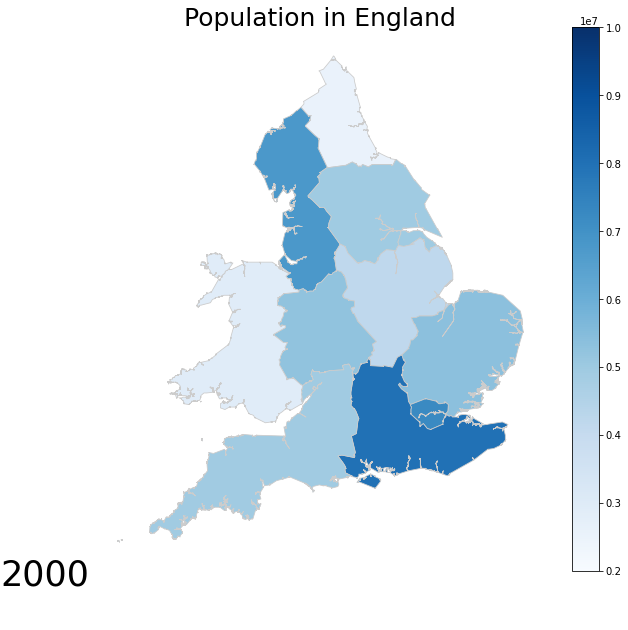

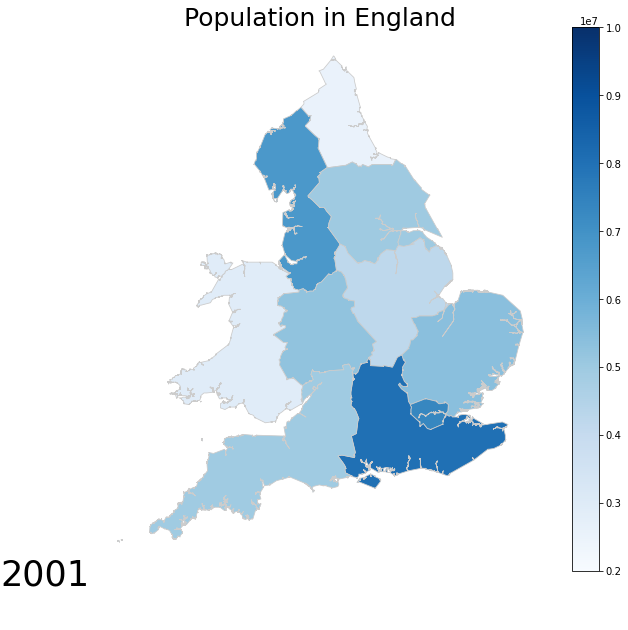

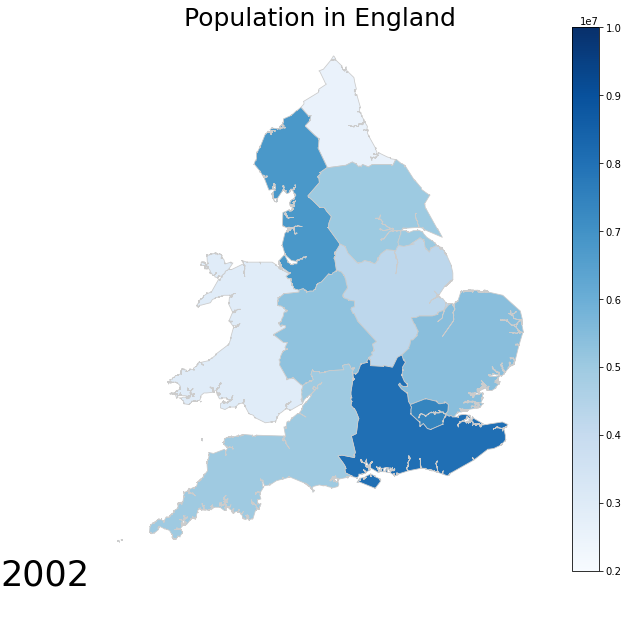

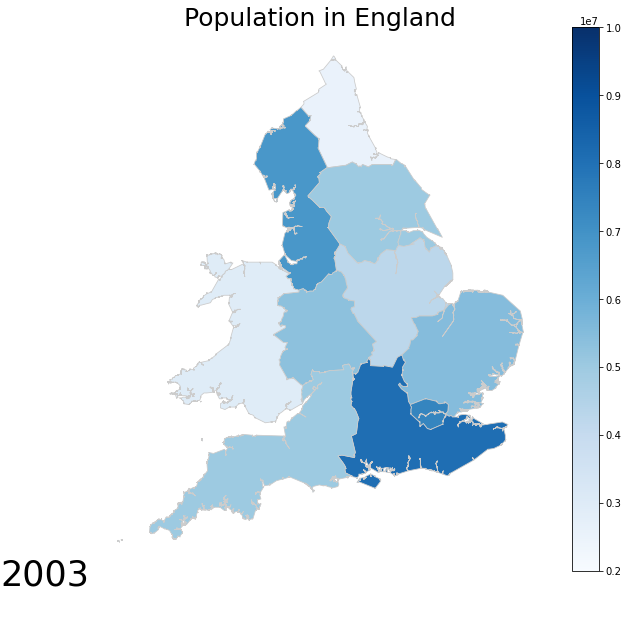

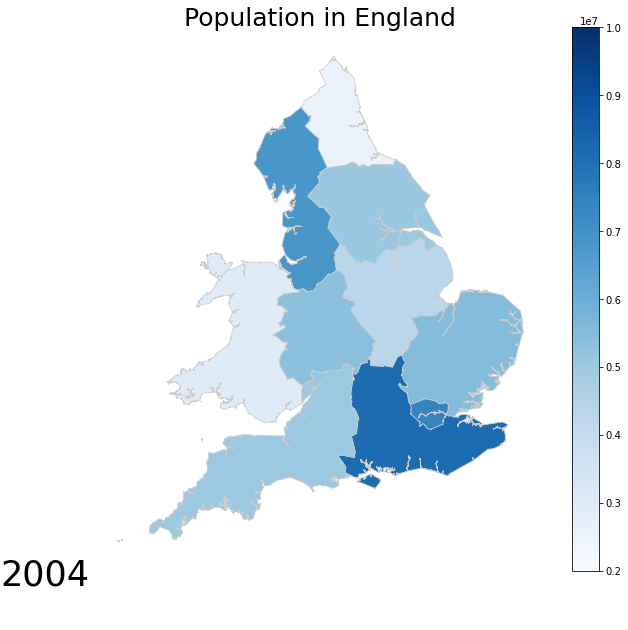

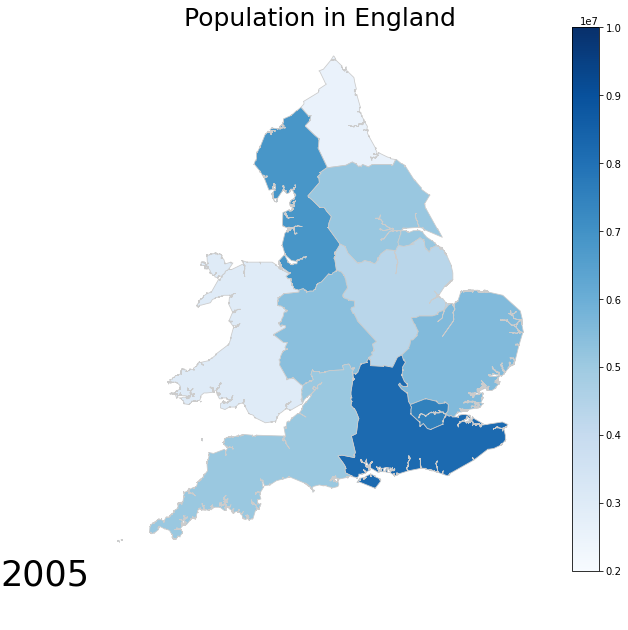

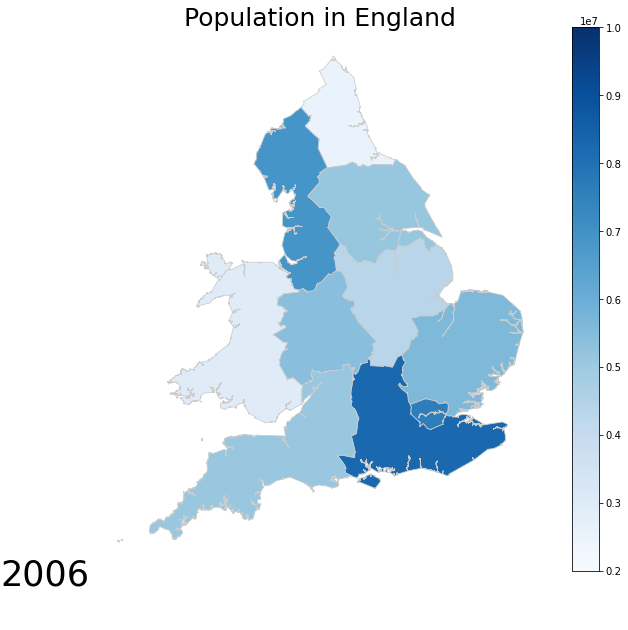

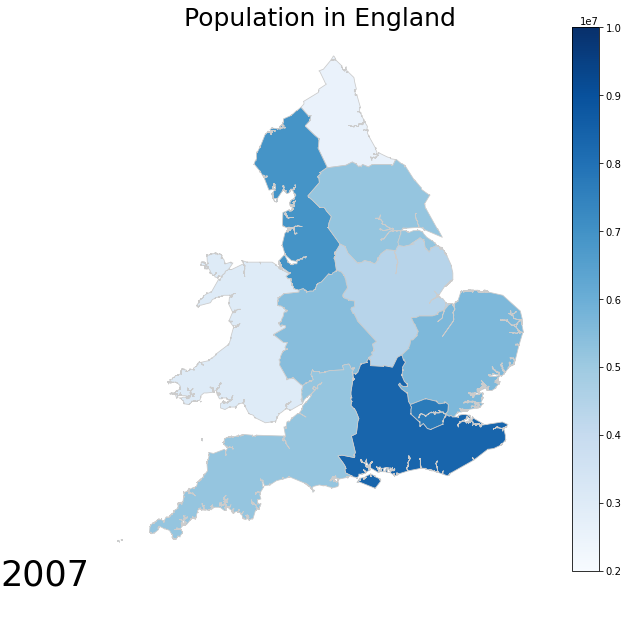

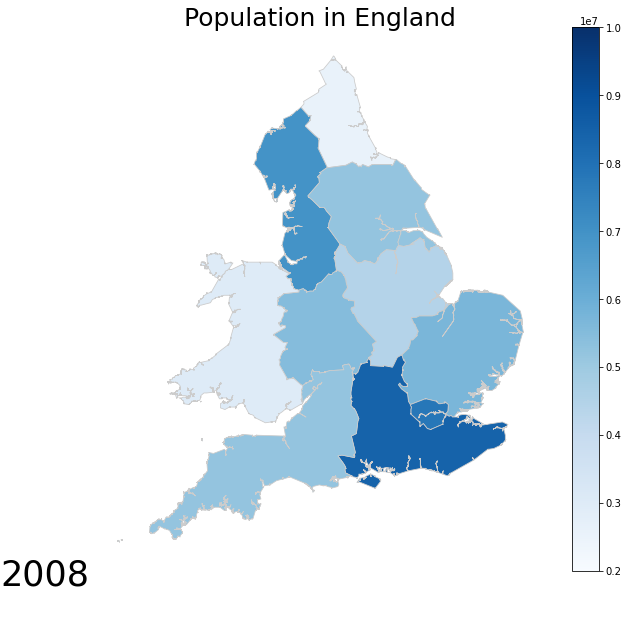

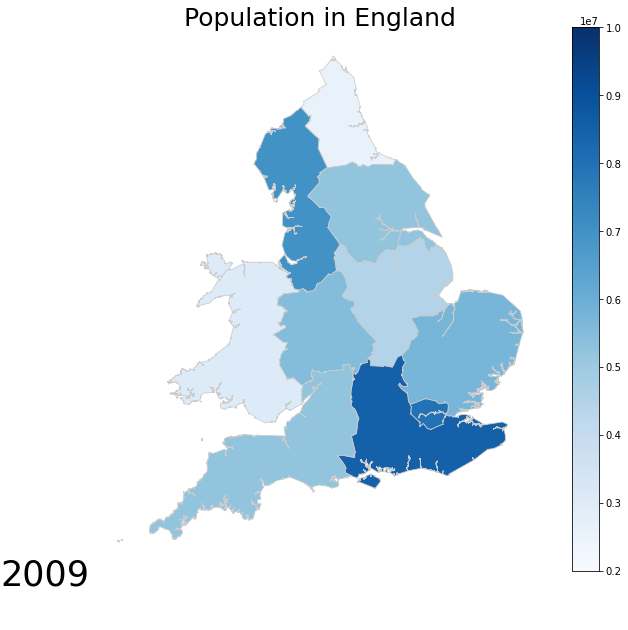

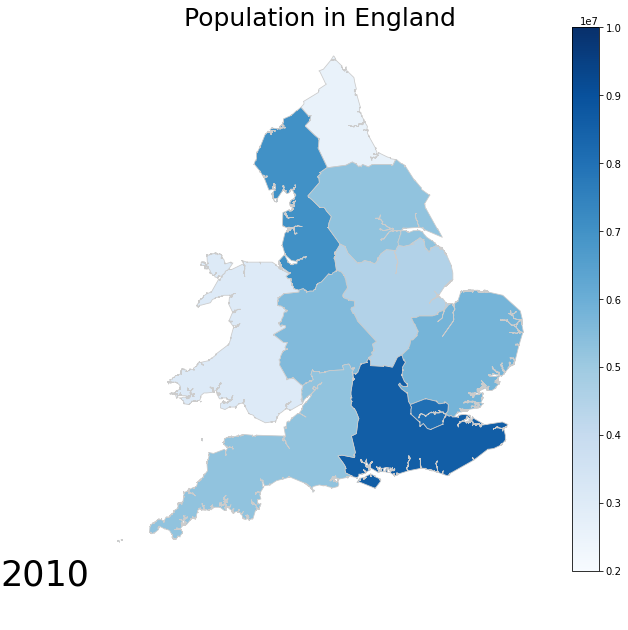

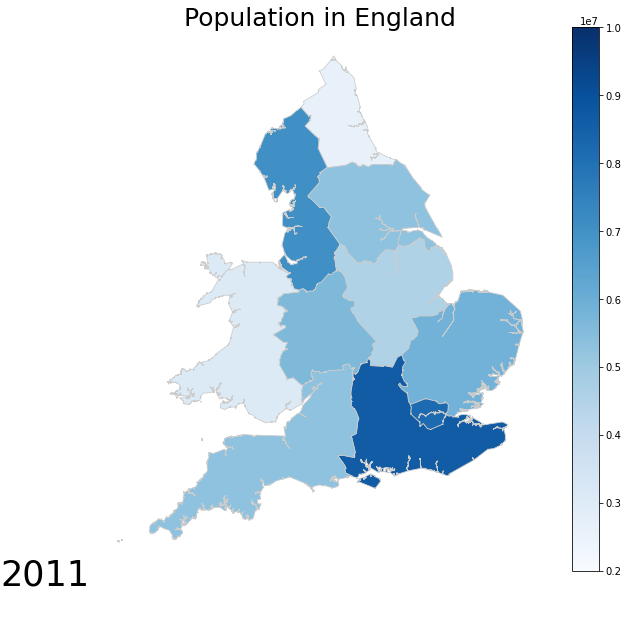

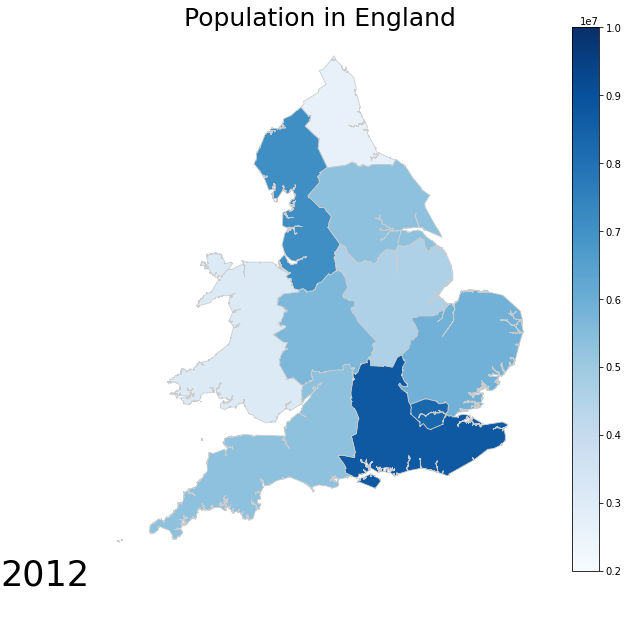

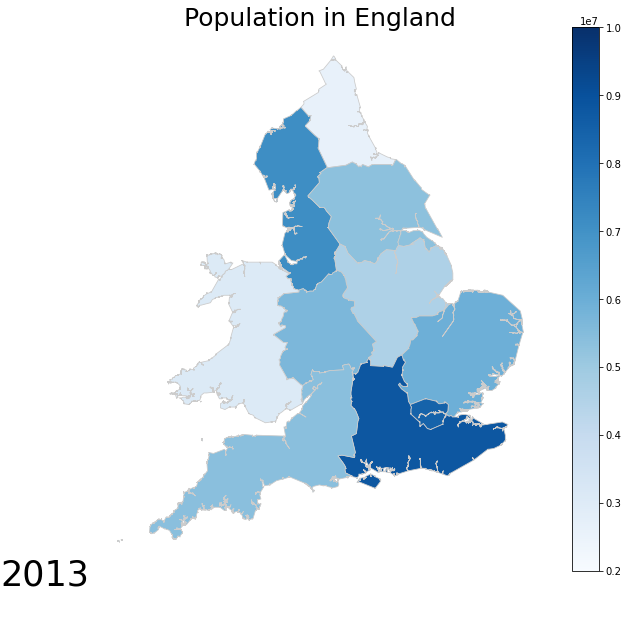

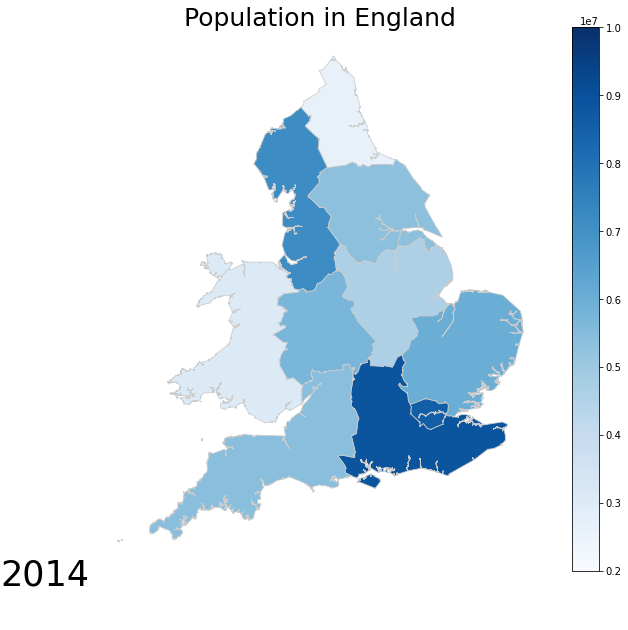

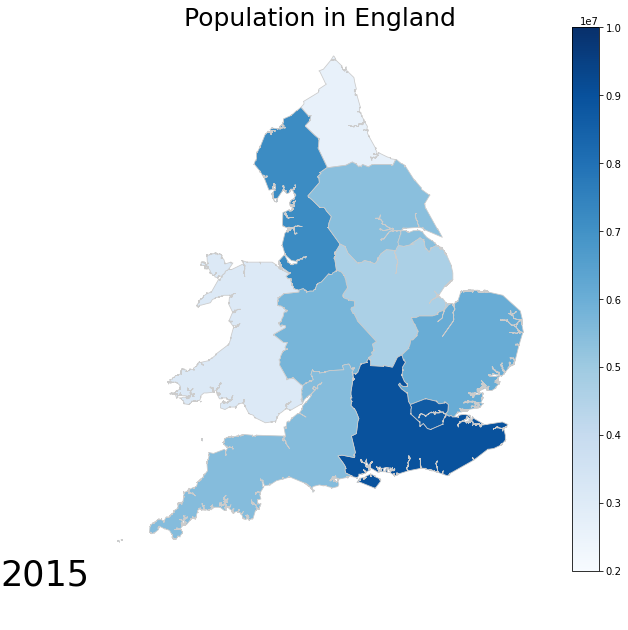

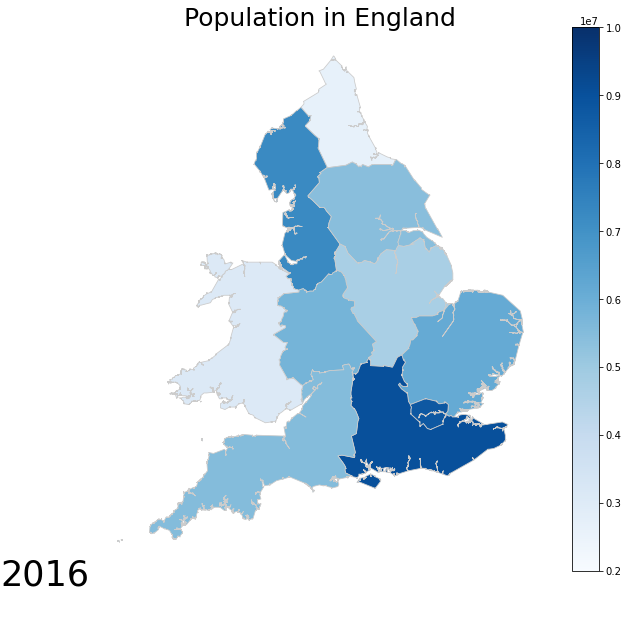

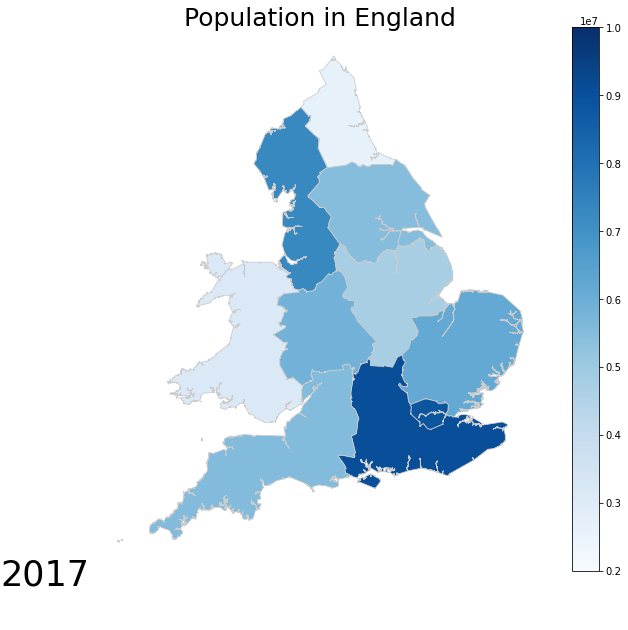

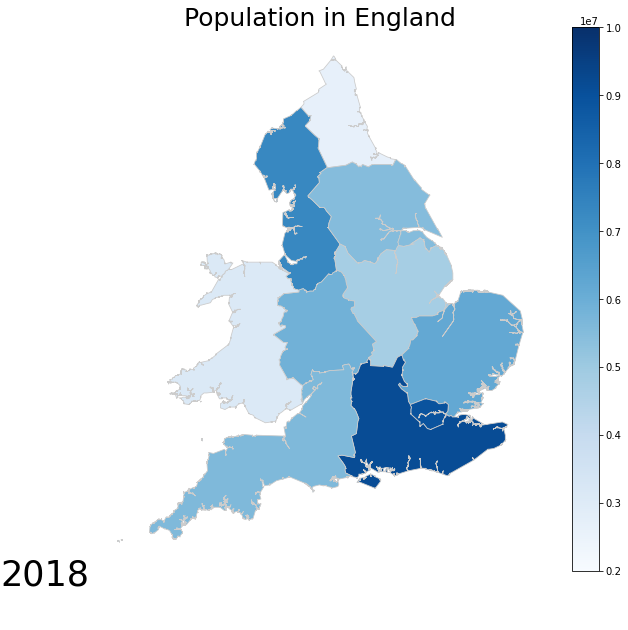

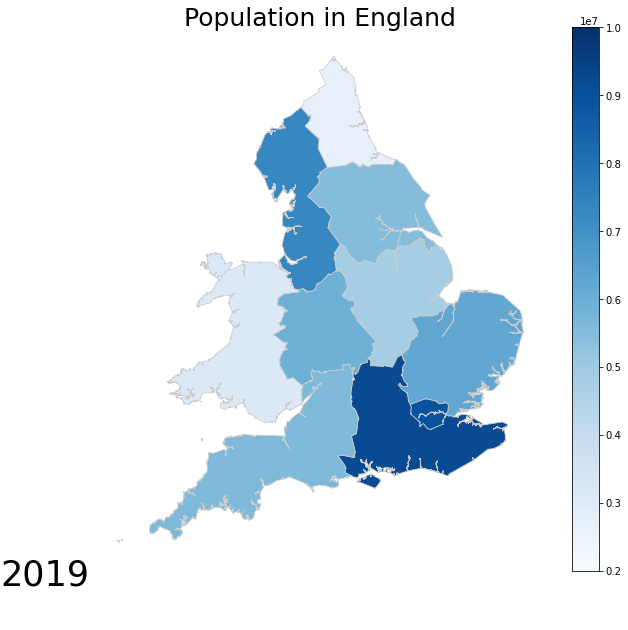

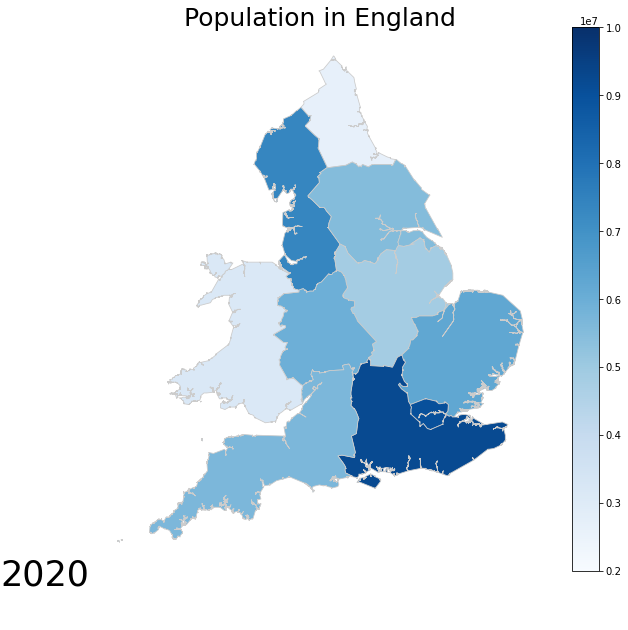

In [9]:
for year in list_of_years:
    fig = merged.plot(column=year, cmap='Blues', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
    legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    fig.axis('off')
    fig.set_title('Population in England', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    fig.annotate(year,
            xy=(0, 0.1), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)

In [10]:
temp = pd.read_csv(r'C:\Users\ishaa\Downloads\weekly_max_min_Friday.csv', parse_dates = ['date'])
temp['year']= pd.DatetimeIndex(temp['date']).year

C:\Users\ishaa\AppData\Local\Temp\ipykernel_3800\1481274278.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  North_East = temp.loc[temp['region_name']=='North East'][temp['year']>=2010][temp['year']<2021]
C:\Users\ishaa\anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ishaa\AppData\Local\Temp\ipykernel_3800\1481274278.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  North_West = temp.loc[temp['region_name']=='North West'][temp['year']>=2010][temp['year']<2021]
C:\Users\ishaa\AppData\Local\Temp\ipykernel_3800\1481274278.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Yorkshire= temp.loc[temp['region_nam

Text(0.5, 1.0, 'Minimum Temperature in Wales (2010-2020)')

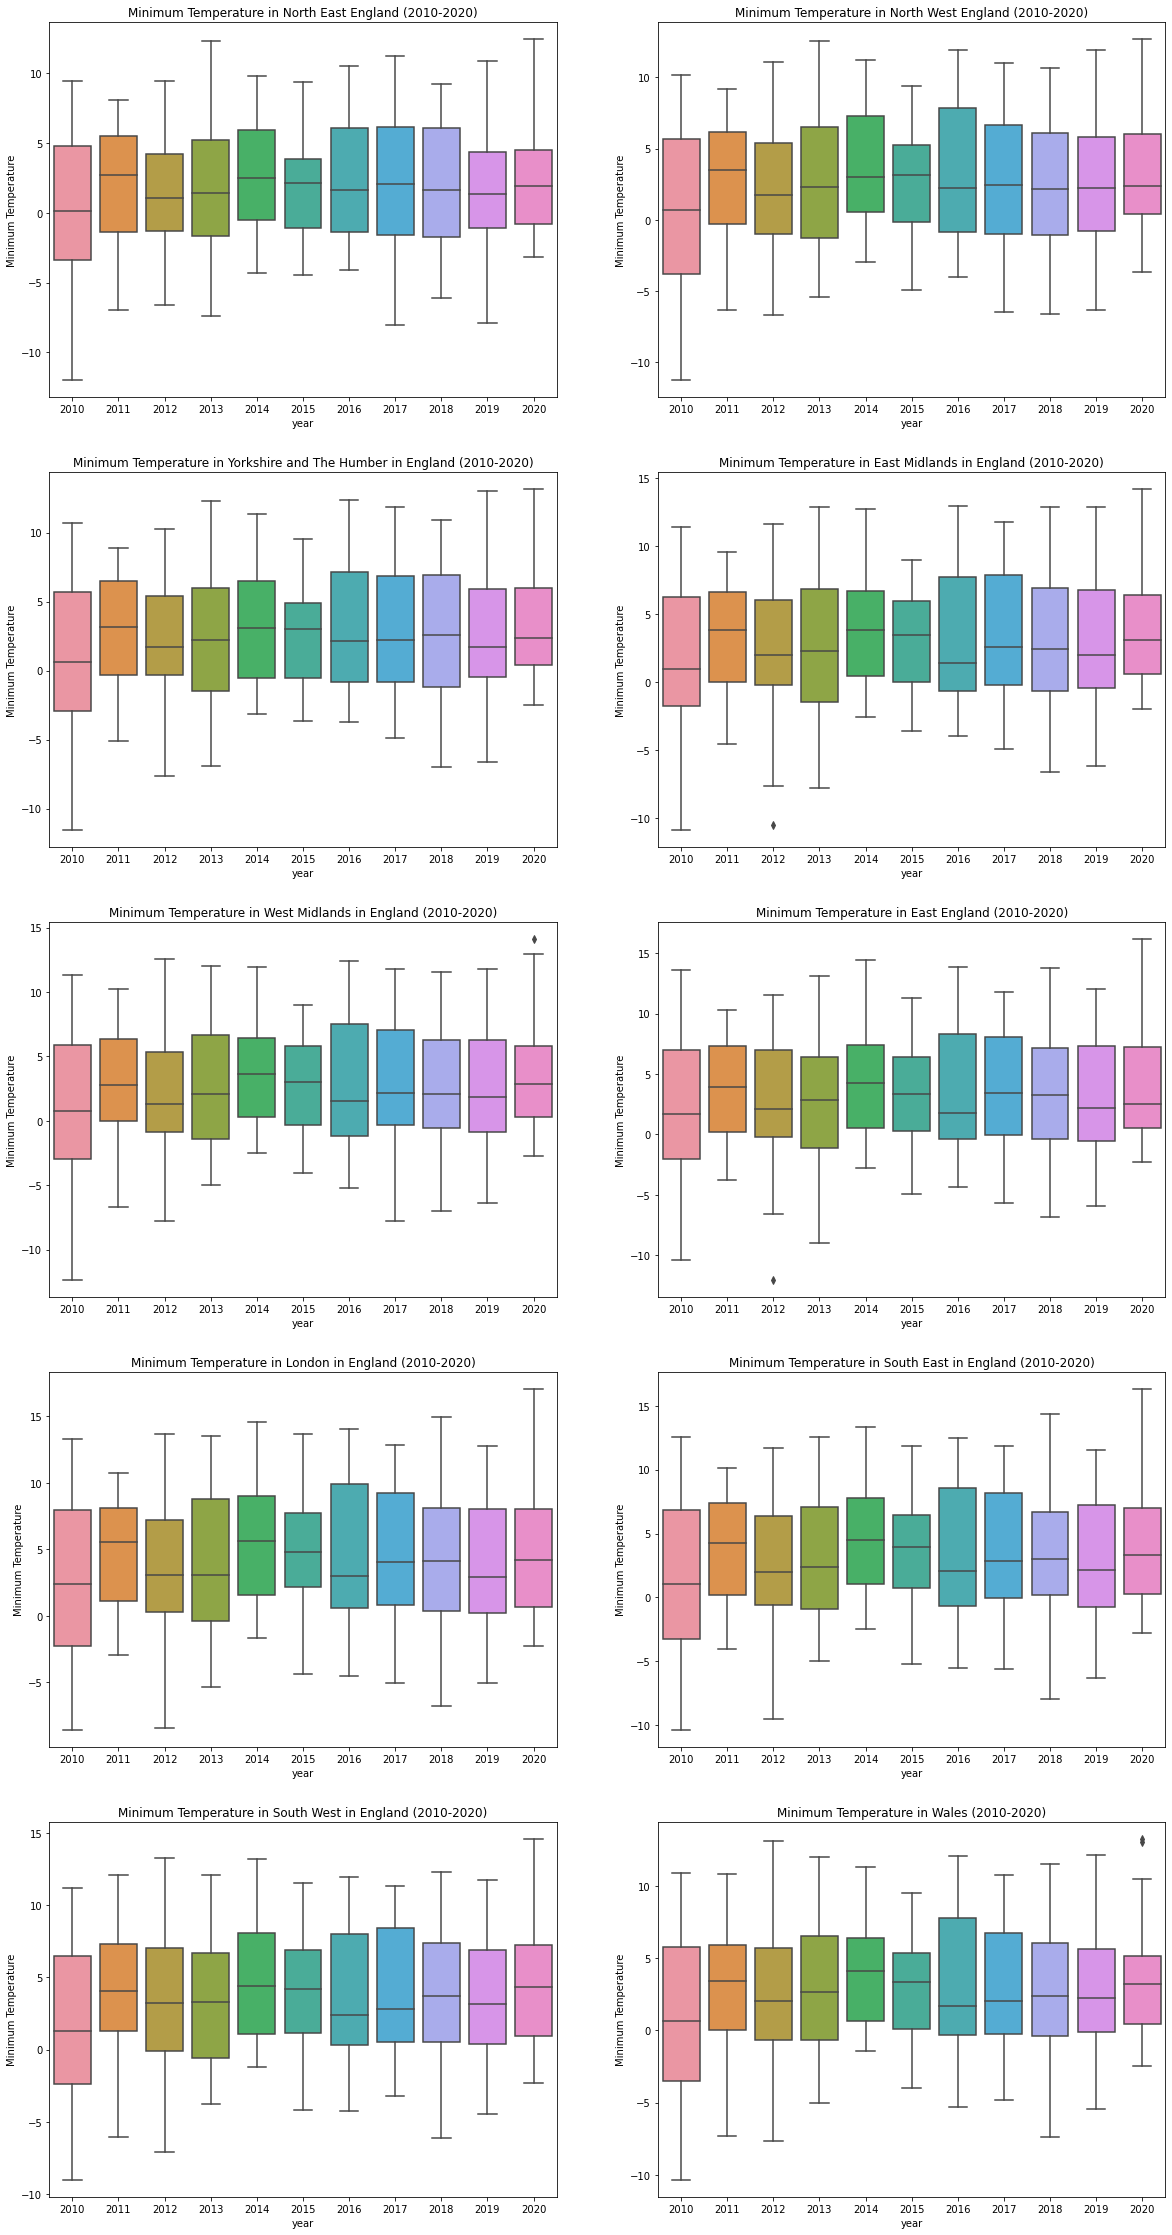

In [11]:
fig, ax = plt.subplots(5,2, figsize=(20,40))

North_East = temp.loc[temp['region_name']=='North East'][temp['year']>=2010][temp['year']<2021]
fig1= sns.boxplot(North_East['year'], North_East['min'], ax=ax[0,0])
fig1.set_ylabel(ylabel = 'Minimum Temperature')
fig1.set_title('Minimum Temperature in North East England (2010-2020)')

North_West = temp.loc[temp['region_name']=='North West'][temp['year']>=2010][temp['year']<2021]
fig2 = sns.boxplot(x=North_West['year'], y=North_West['min'], ax=ax[0,1])
fig2.set_ylabel(ylabel = 'Minimum Temperature')
fig2.set_title('Minimum Temperature in North West England (2010-2020)')

Yorkshire= temp.loc[temp['region_name']=='Yorkshire and The Humber'][temp['year']>=2010][temp['year']<2021]
fig3 = sns.boxplot(x=Yorkshire['year'], y=Yorkshire['min'], ax=ax[1,0])
fig3.set_ylabel(ylabel = 'Minimum Temperature')
fig3.set_title('Minimum Temperature in Yorkshire and The Humber in England (2010-2020)')

East_Midlands= temp.loc[temp['region_name']=='East Midlands'][temp['year']>=2010][temp['year']<2021]
fig4 = sns.boxplot(x=East_Midlands['year'], y=East_Midlands['min'], ax=ax[1,1])
fig4.set_ylabel(ylabel = 'Minimum Temperature')
fig4.set_title('Minimum Temperature in East Midlands in England (2010-2020)')

West_Midlands= temp.loc[temp['region_name']=='West Midlands'][temp['year']>=2010][temp['year']<2021]
fig5 = sns.boxplot(x=West_Midlands['year'], y=West_Midlands['min'], ax=ax[2,0])
fig5.set_ylabel(ylabel = 'Minimum Temperature')
fig5.set_title('Minimum Temperature in West Midlands in England (2010-2020)')

East= temp.loc[temp['region_name']=='East'][temp['year']>=2010][temp['year']<2021]
fig6 = sns.boxplot(x=East['year'], y=East['min'], ax=ax[2,1])
fig6.set_ylabel(ylabel = 'Minimum Temperature')
fig6.set_title('Minimum Temperature in East England (2010-2020)')

London= temp.loc[temp['region_name']=='London'][temp['year']>=2010][temp['year']<2021]
fig7 = sns.boxplot(x=London['year'], y=London['min'], ax=ax[3,0])
fig7.set_ylabel(ylabel = 'Minimum Temperature')
fig7.set_title('Minimum Temperature in London in England (2010-2020)')

South_East= temp.loc[temp['region_name']=='South East'][temp['year']>=2010][temp['year']<2021]
fig8 = sns.boxplot(x=South_East['year'], y=South_East['min'], ax=ax[3,1])
fig8.set_ylabel(ylabel = 'Minimum Temperature')
fig8.set_title('Minimum Temperature in South East in England (2010-2020)')

South_West= temp.loc[temp['region_name']=='South West'][temp['year']>=2010][temp['year']<2021]
fig9 = sns.boxplot(x=South_West['year'], y=South_West['min'], ax=ax[4,0])
fig9.set_ylabel(ylabel = 'Minimum Temperature')
fig9.set_title('Minimum Temperature in South West in England (2010-2020)')

Wales= temp.loc[temp['region_name']=='Wales'][temp['year']>=2010][temp['year']<2021]
fig10 = sns.boxplot(x=Wales['year'], y=Wales['min'], ax=ax[4,1])
fig10.set_ylabel(ylabel = 'Minimum Temperature')
fig10.set_title('Minimum Temperature in Wales (2010-2020)')

C:\Users\ishaa\AppData\Local\Temp\ipykernel_3800\3333419614.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  North_East = temp.loc[temp['region_name']=='North East'][temp['year']>=2010][temp['year']<2021]
C:\Users\ishaa\anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ishaa\AppData\Local\Temp\ipykernel_3800\3333419614.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  North_West = temp.loc[temp['region_name']=='North West'][temp['year']>=2010][temp['year']<2021]
C:\Users\ishaa\AppData\Local\Temp\ipykernel_3800\3333419614.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Yorkshire= temp.loc[temp['region_nam

Text(0.5, 1.0, 'Maximum Temperature in Wales (2010-2020)')

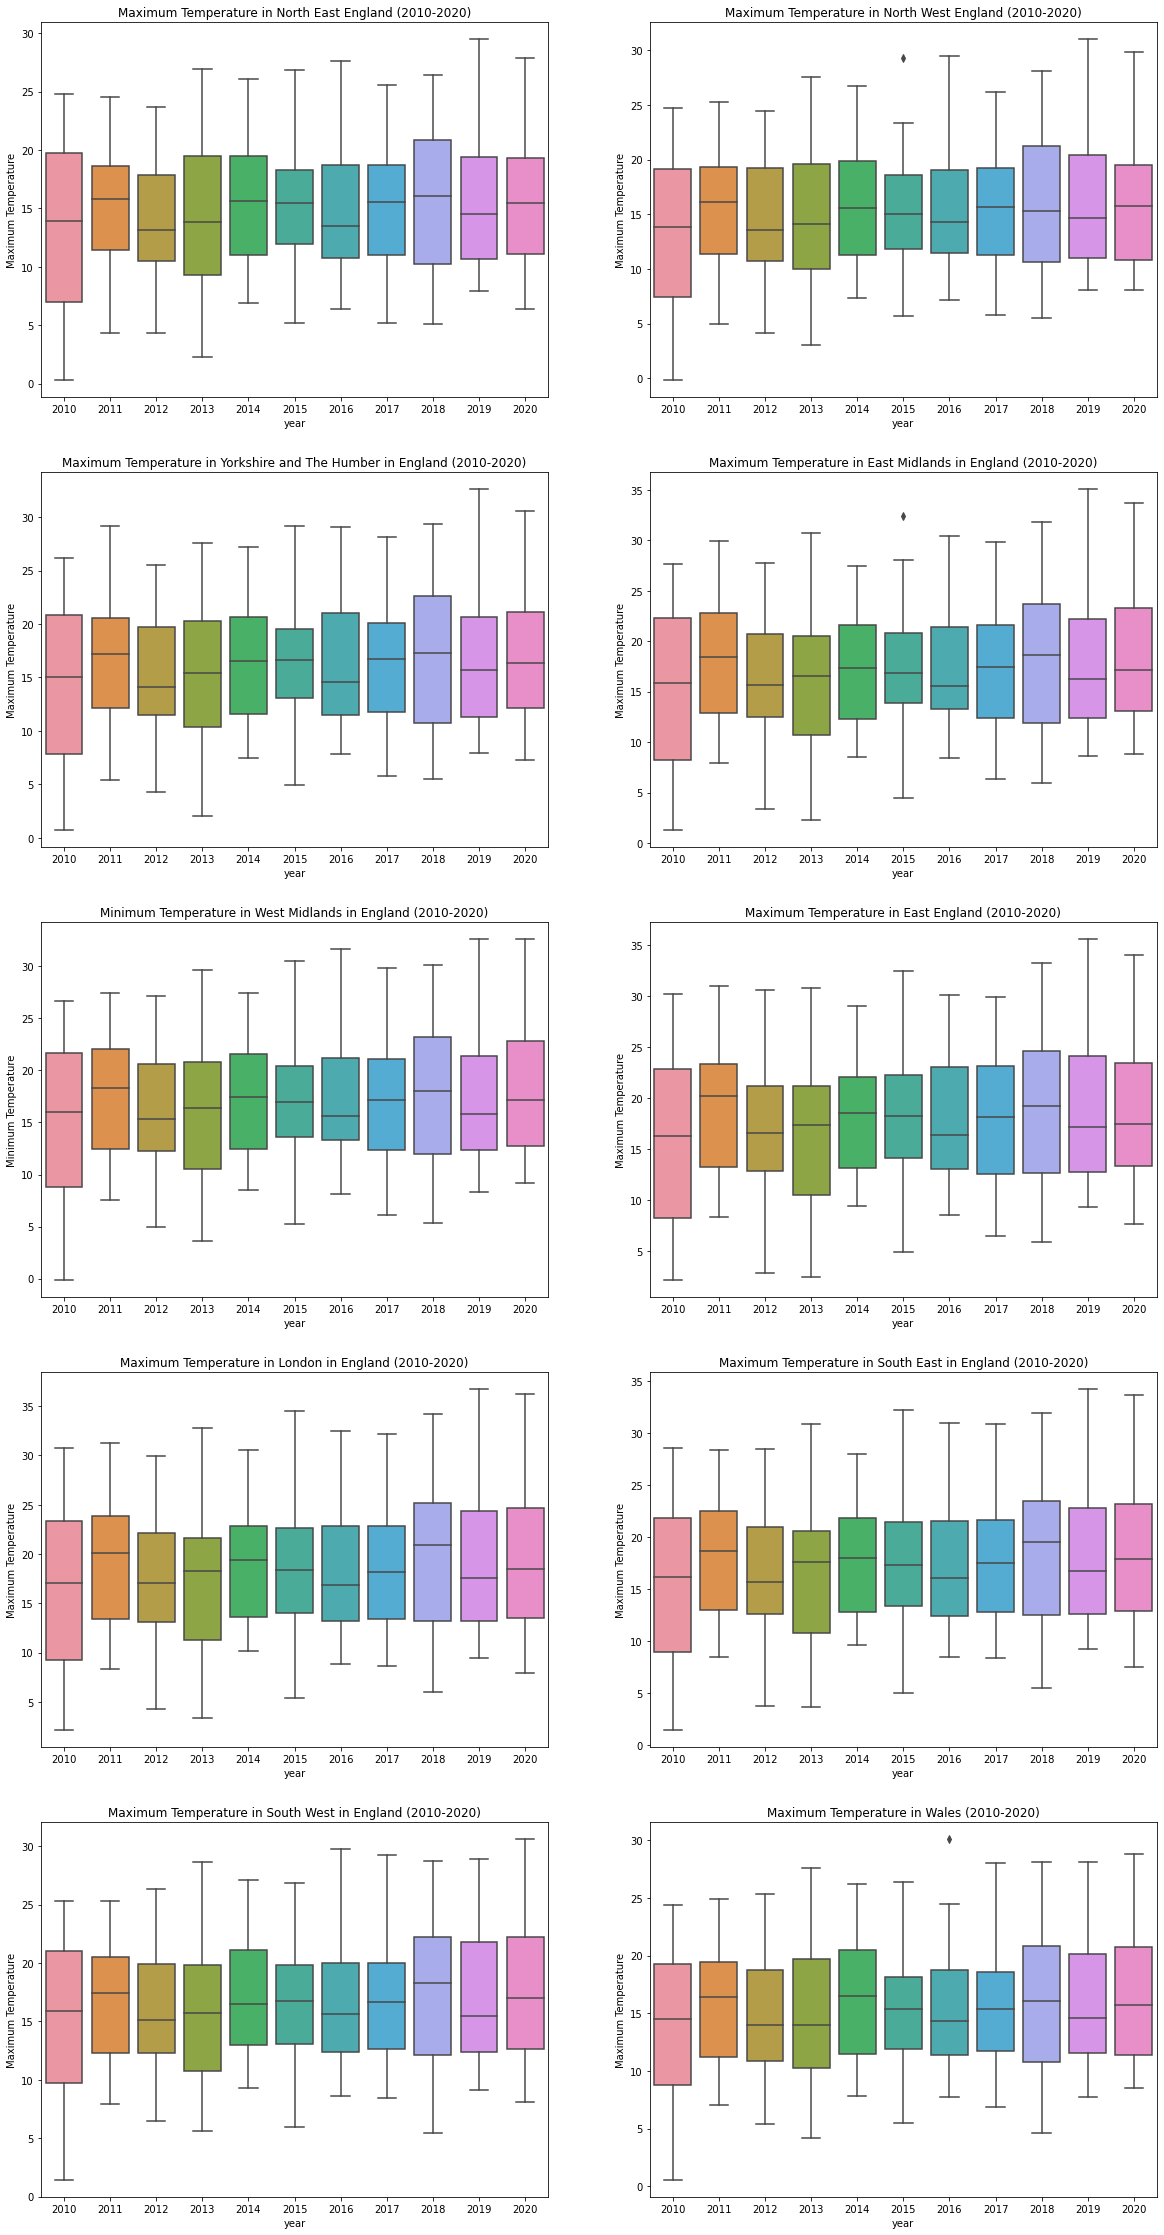

In [12]:
fig, ax = plt.subplots(5,2, figsize=(20,40))

North_East = temp.loc[temp['region_name']=='North East'][temp['year']>=2010][temp['year']<2021]
fig1= sns.boxplot(North_East['year'], North_East['max'], ax=ax[0,0])
fig1.set_ylabel(ylabel = 'Maximum Temperature')
fig1.set_title('Maximum Temperature in North East England (2010-2020)')

North_West = temp.loc[temp['region_name']=='North West'][temp['year']>=2010][temp['year']<2021]
fig2 = sns.boxplot(x=North_West['year'], y=North_West['max'], ax=ax[0,1])
fig2.set_ylabel(ylabel = 'Maximum Temperature')
fig2.set_title('Maximum Temperature in North West England (2010-2020)')

Yorkshire= temp.loc[temp['region_name']=='Yorkshire and The Humber'][temp['year']>=2010][temp['year']<2021]
fig3 = sns.boxplot(x=Yorkshire['year'], y=Yorkshire['max'], ax=ax[1,0])
fig3.set_ylabel(ylabel = 'Maximum Temperature')
fig3.set_title('Maximum Temperature in Yorkshire and The Humber in England (2010-2020)')

East_Midlands= temp.loc[temp['region_name']=='East Midlands'][temp['year']>=2010][temp['year']<2021]
fig4 = sns.boxplot(x=East_Midlands['year'], y=East_Midlands['max'], ax=ax[1,1])
fig4.set_ylabel(ylabel = 'Maximum Temperature')
fig4.set_title('Maximum Temperature in East Midlands in England (2010-2020)')

West_Midlands= temp.loc[temp['region_name']=='West Midlands'][temp['year']>=2010][temp['year']<2021]
fig5 = sns.boxplot(x=West_Midlands['year'], y=West_Midlands['max'], ax=ax[2,0])
fig5.set_ylabel(ylabel = 'Minimum Temperature')
fig5.set_title('Minimum Temperature in West Midlands in England (2010-2020)')

East= temp.loc[temp['region_name']=='East'][temp['year']>=2010][temp['year']<2021]
fig6 = sns.boxplot(x=East['year'], y=East['max'], ax=ax[2,1])
fig6.set_ylabel(ylabel = 'Maximum Temperature')
fig6.set_title('Maximum Temperature in East England (2010-2020)')

London= temp.loc[temp['region_name']=='London'][temp['year']>=2010][temp['year']<2021]
fig7 = sns.boxplot(x=London['year'], y=London['max'], ax=ax[3,0])
fig7.set_ylabel(ylabel = 'Maximum Temperature')
fig7.set_title('Maximum Temperature in London in England (2010-2020)')

South_East= temp.loc[temp['region_name']=='South East'][temp['year']>=2010][temp['year']<2021]
fig8 = sns.boxplot(x=South_East['year'], y=South_East['max'], ax=ax[3,1])
fig8.set_ylabel(ylabel = 'Maximum Temperature')
fig8.set_title('Maximum Temperature in South East in England (2010-2020)')

South_West= temp.loc[temp['region_name']=='South West'][temp['year']>=2010][temp['year']<2021]
fig9 = sns.boxplot(x=South_West['year'], y=South_West['max'], ax=ax[4,0])
fig9.set_ylabel(ylabel = 'Maximum Temperature')
fig9.set_title('Maximum Temperature in South West in England (2010-2020)')

Wales= temp.loc[temp['region_name']=='Wales'][temp['year']>=2010][temp['year']<2021]
fig10 = sns.boxplot(x=Wales['year'], y=Wales['max'], ax=ax[4,1])
fig10.set_ylabel(ylabel = 'Maximum Temperature')
fig10.set_title('Maximum Temperature in Wales (2010-2020)')

In [13]:
list_of_years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
vmin, vmax = 0, 5
i=0

In [14]:
temp2 = temp.pivot_table('min', ['region_name'], 'year')
temp2.rename({'Yorkshire and The Humber':'Yorkshire and the Humber'}, inplace = True)
temp2['Region']= temp2.index

In [15]:
uk_geojson = gpd.read_file(r'C:\Users\ishaa\Downloads\uk_regions.geojson')
new = uk_geojson.drop([uk_geojson.index[9], uk_geojson.index[10]])
merged2 = new.set_index('rgn19nm').join(temp2.set_index('Region'))
merged2.reset_index()
merged2['Region_Name']=merged2.index
merged2.drop(columns=2021, inplace=True)

C:\Users\ishaa\anaconda3\envs\geo_env\lib\site-packages\geopandas\plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


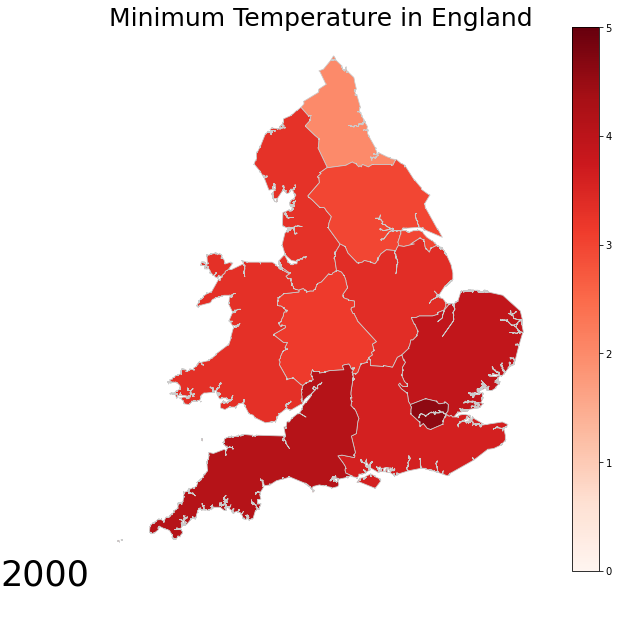

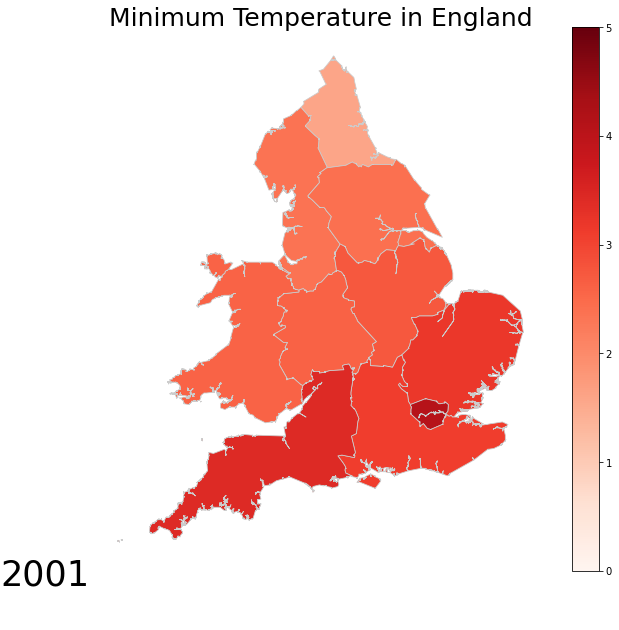

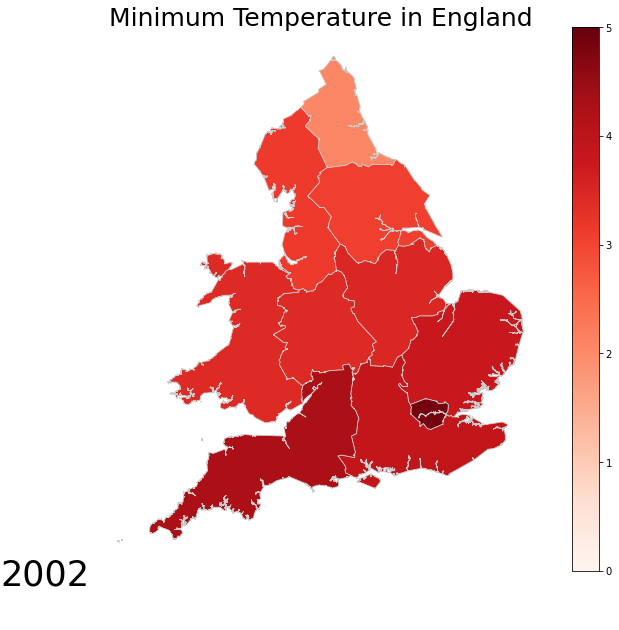

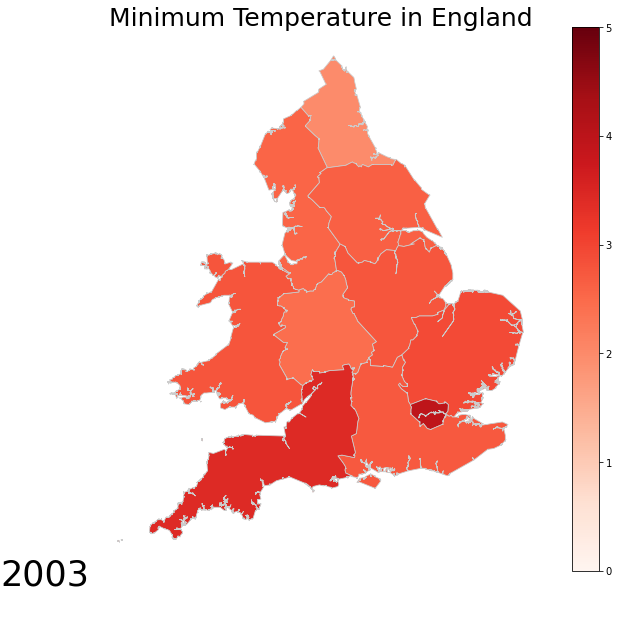

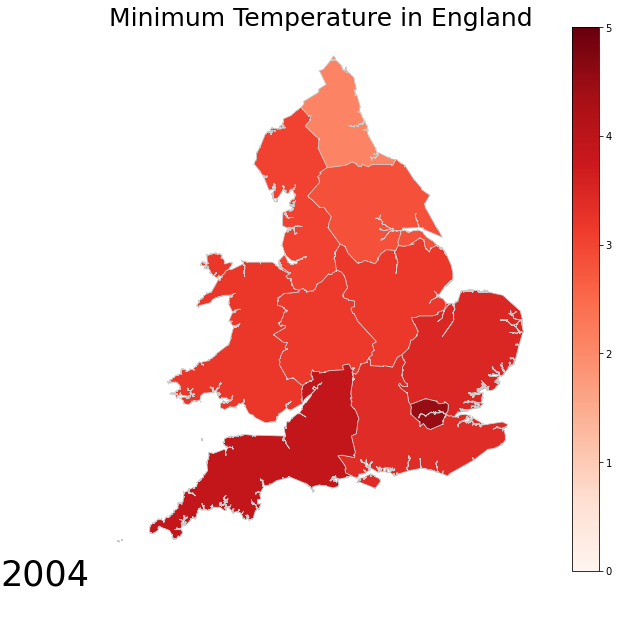

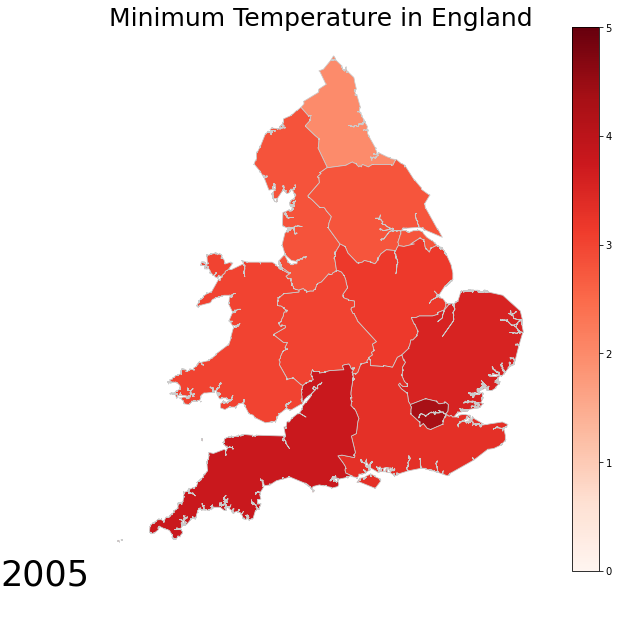

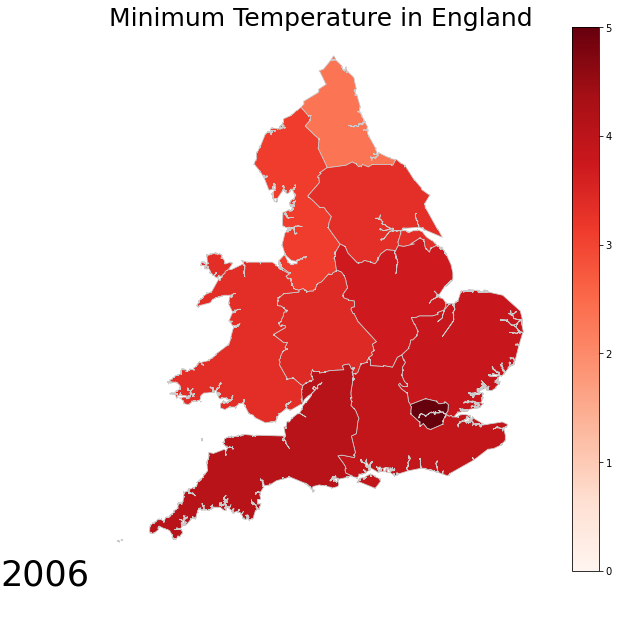

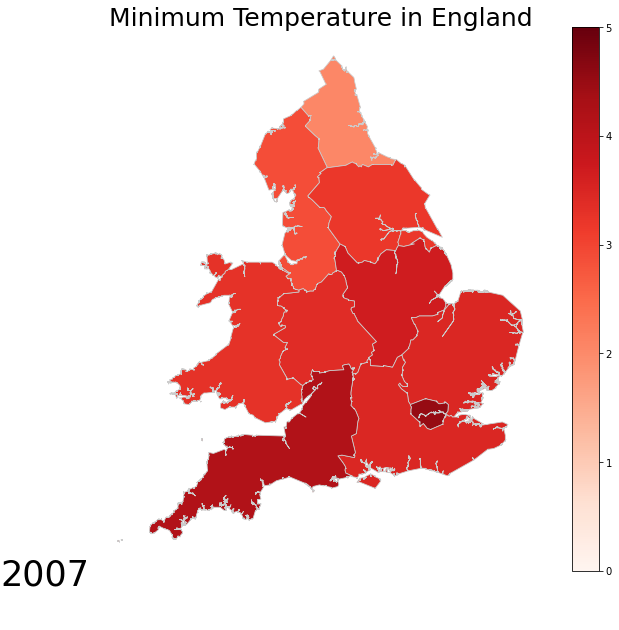

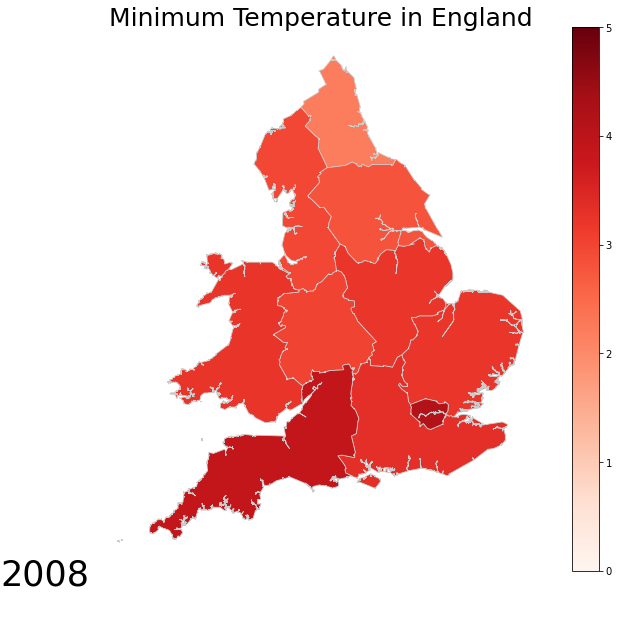

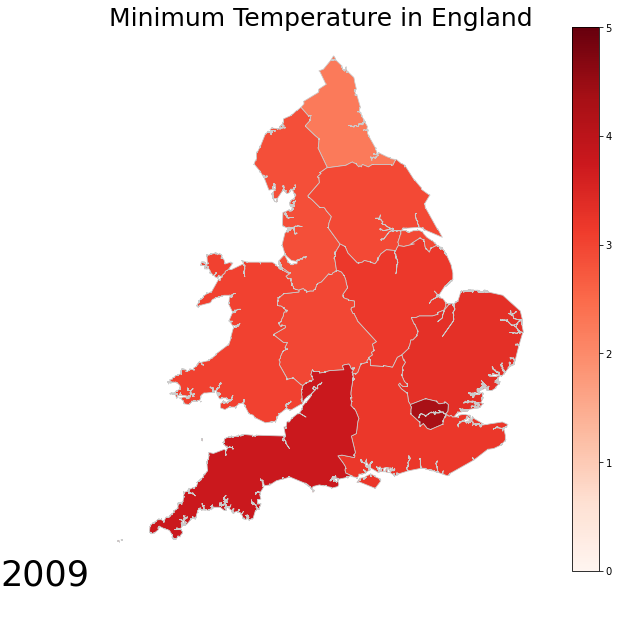

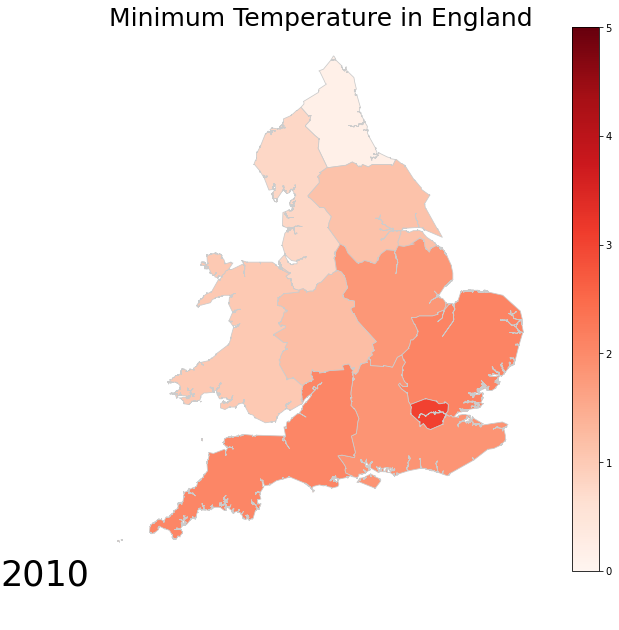

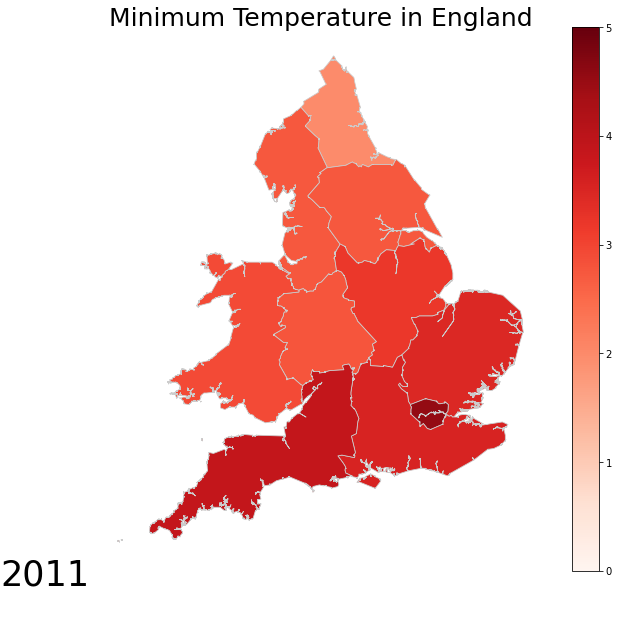

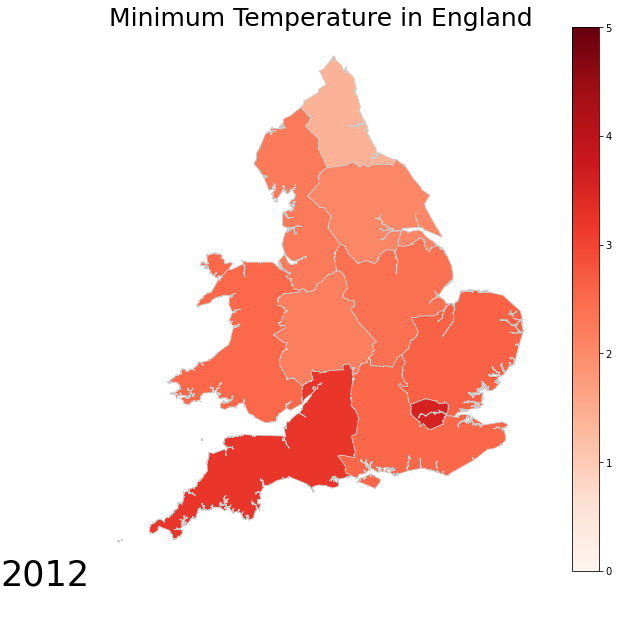

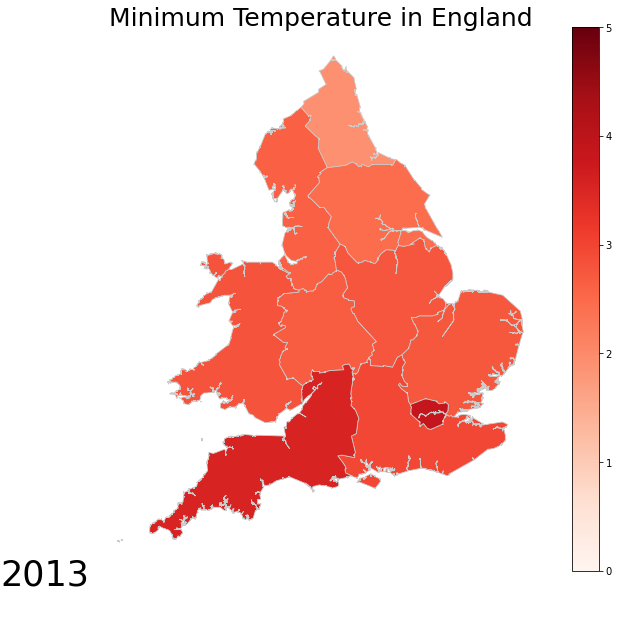

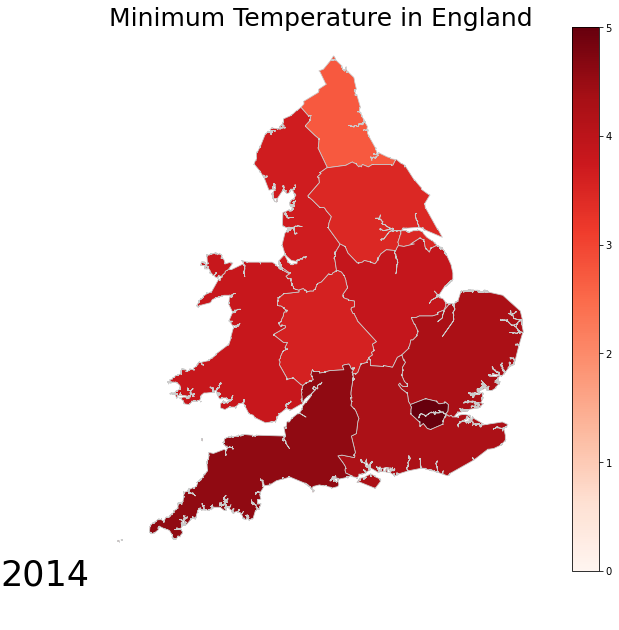

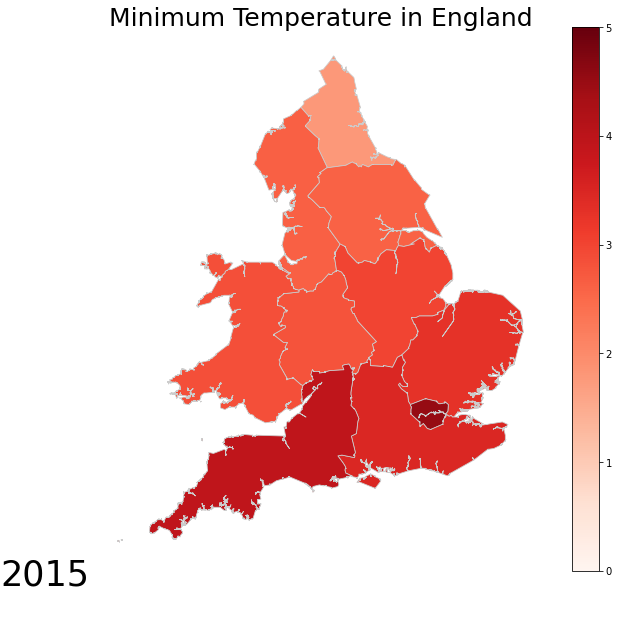

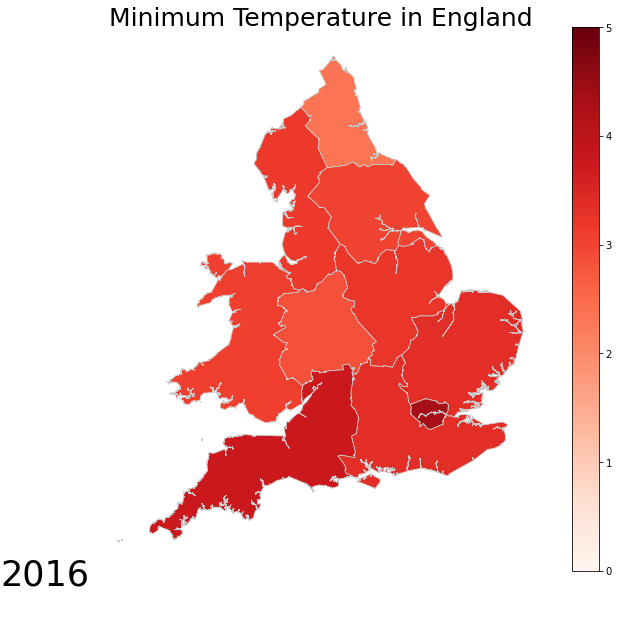

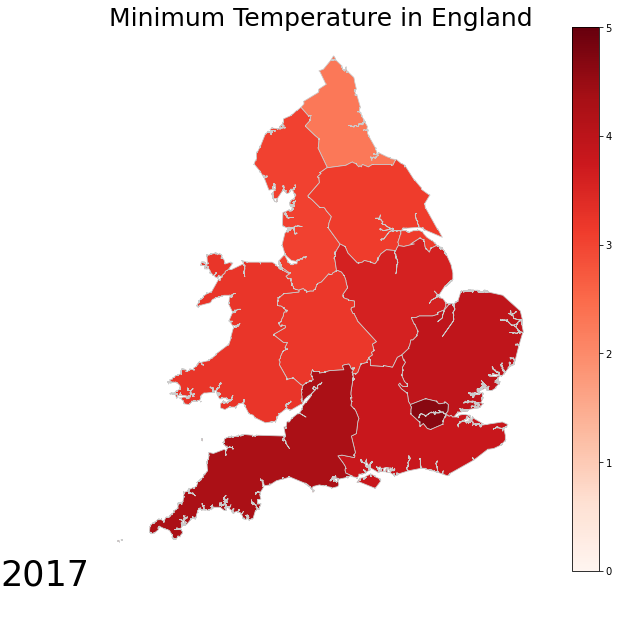

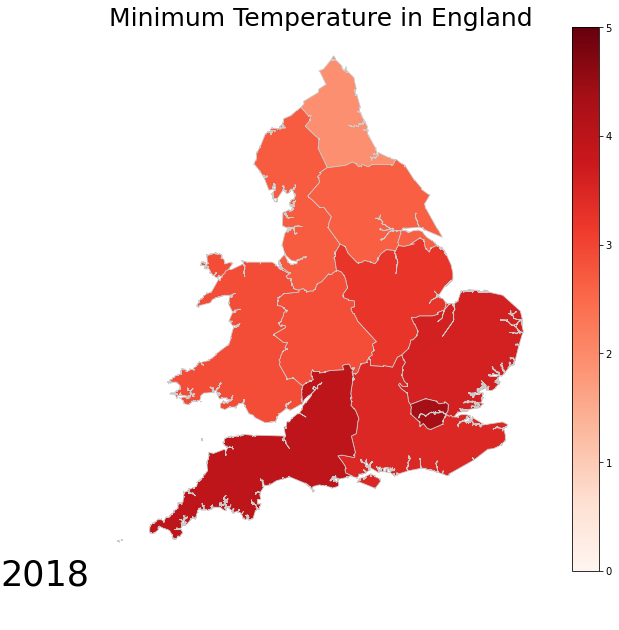

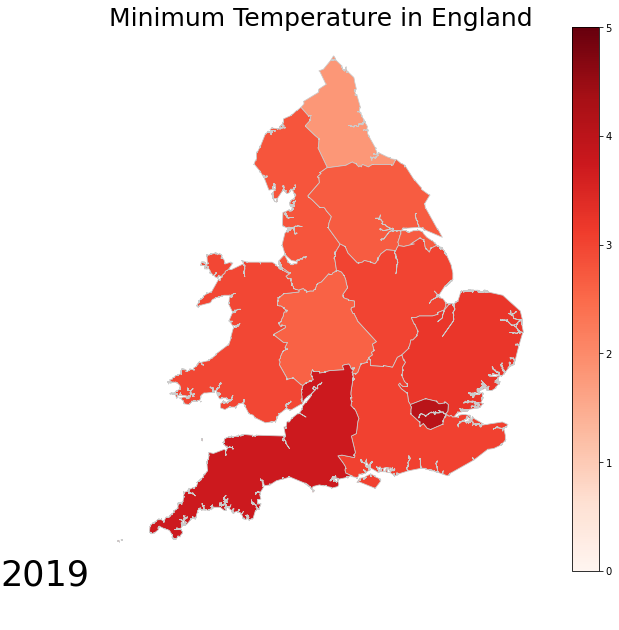

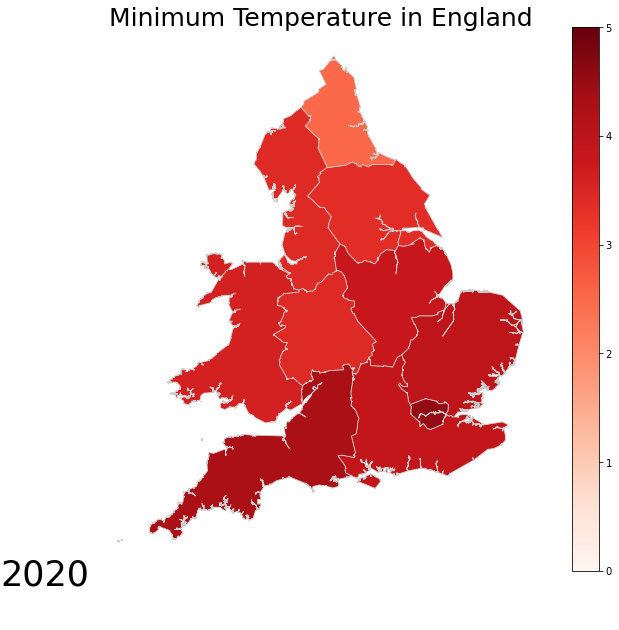

In [16]:
for year in list_of_years:
    fig = merged2.plot(column=year, cmap='Reds', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
    legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    fig.axis('off')
    fig.set_title('Minimum Temperature in England', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    fig.annotate(year,
            xy=(0, 0.1), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)

In [17]:
list_of_years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
vmin, vmax = 13, 20
i=0

In [18]:
temp3 = temp.pivot_table('max', ['region_name'], 'year')
temp3.rename({'Yorkshire and The Humber':'Yorkshire and the Humber'}, inplace = True)
temp3['Region']= temp3.index

In [19]:
merged3 = new.set_index('rgn19nm').join(temp3.set_index('Region'))
merged3.reset_index()
merged3['Region_Name']=merged3.index

C:\Users\ishaa\anaconda3\envs\geo_env\lib\site-packages\geopandas\plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


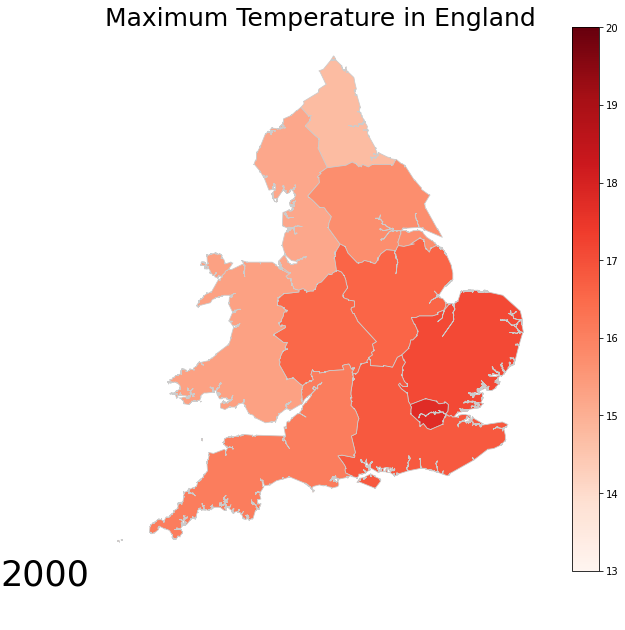

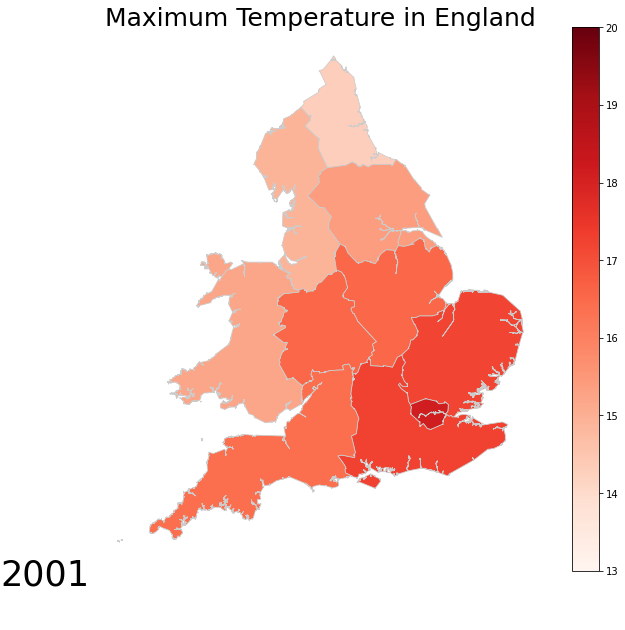

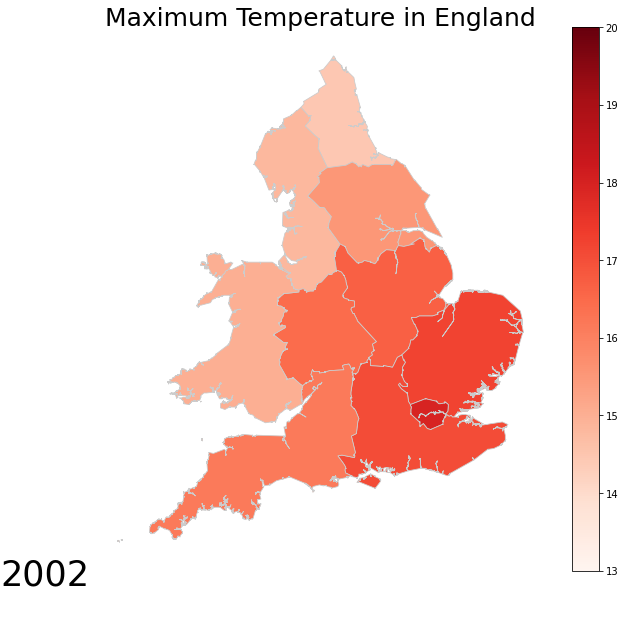

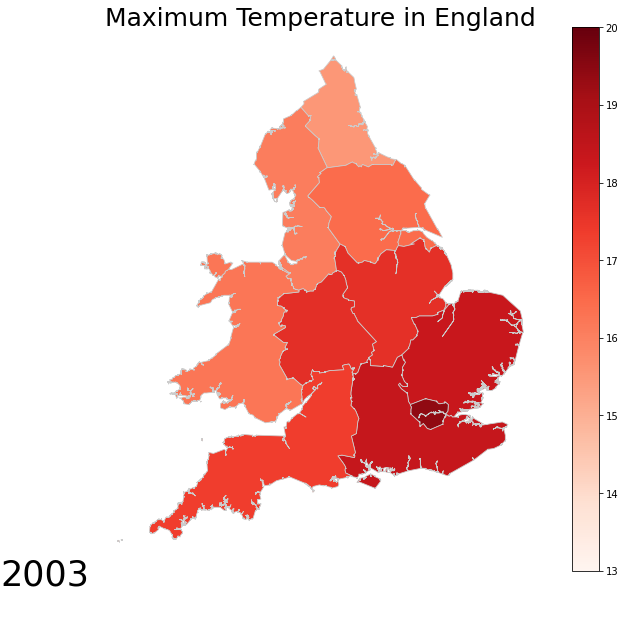

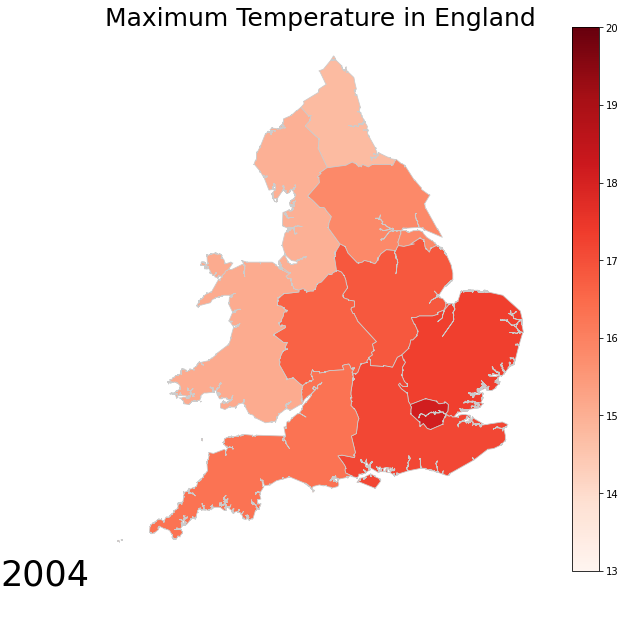

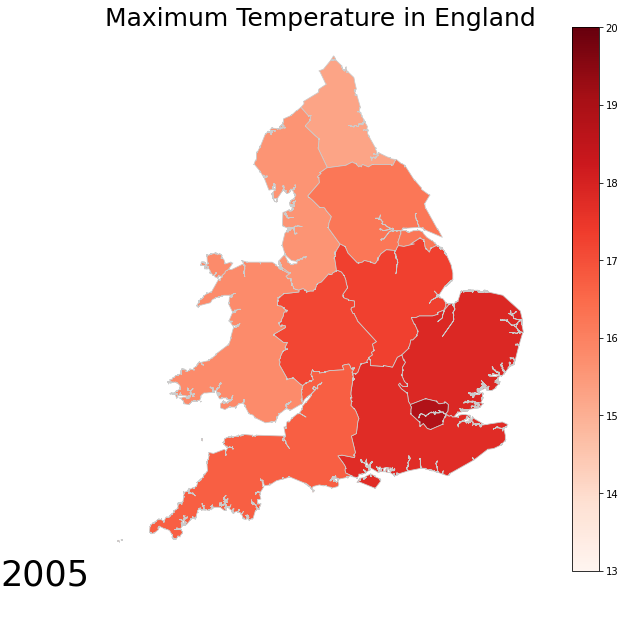

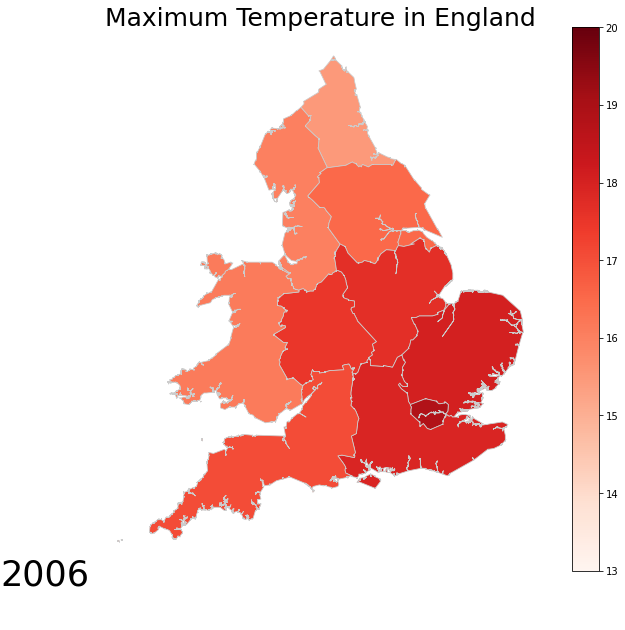

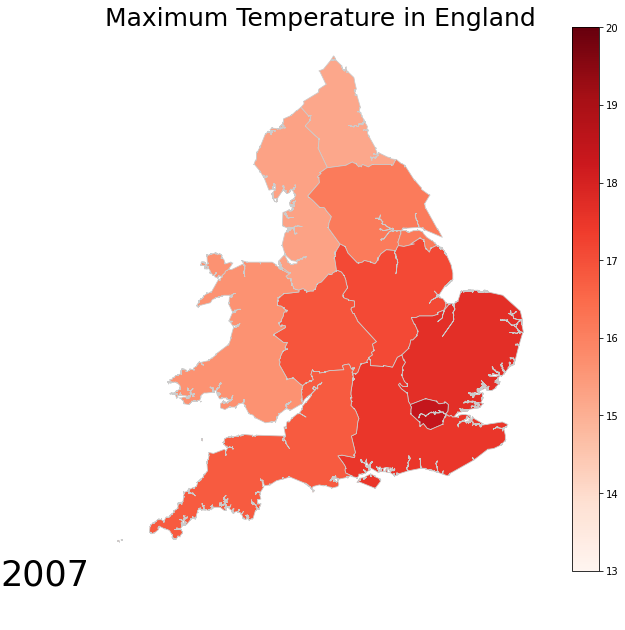

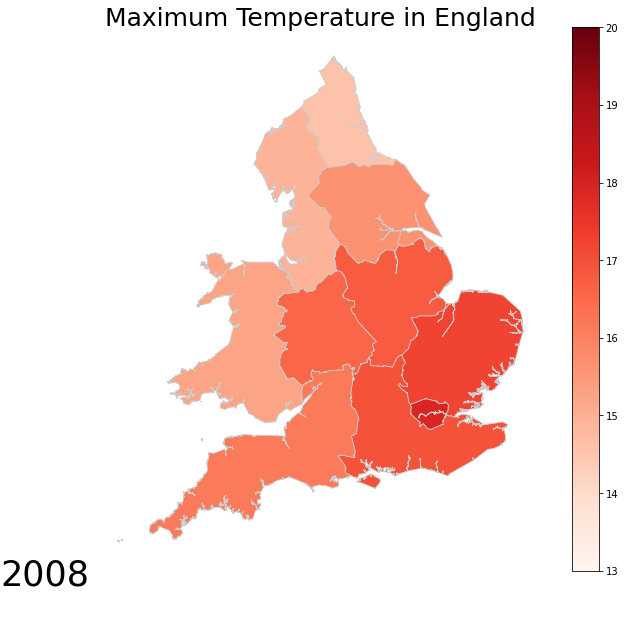

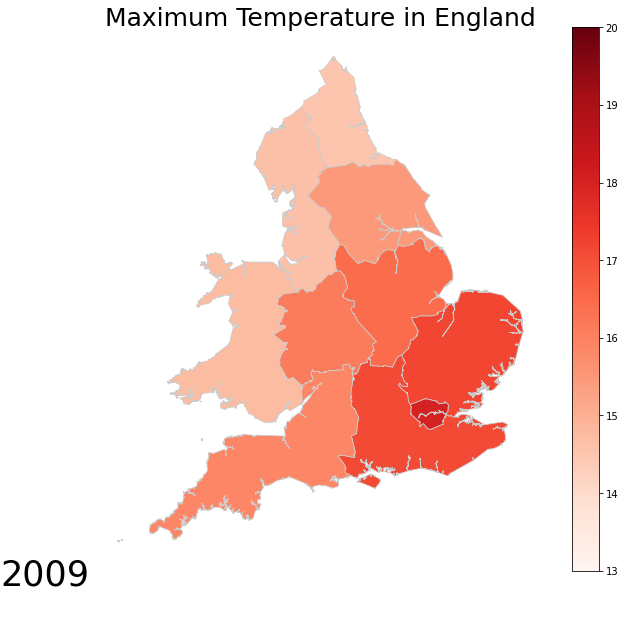

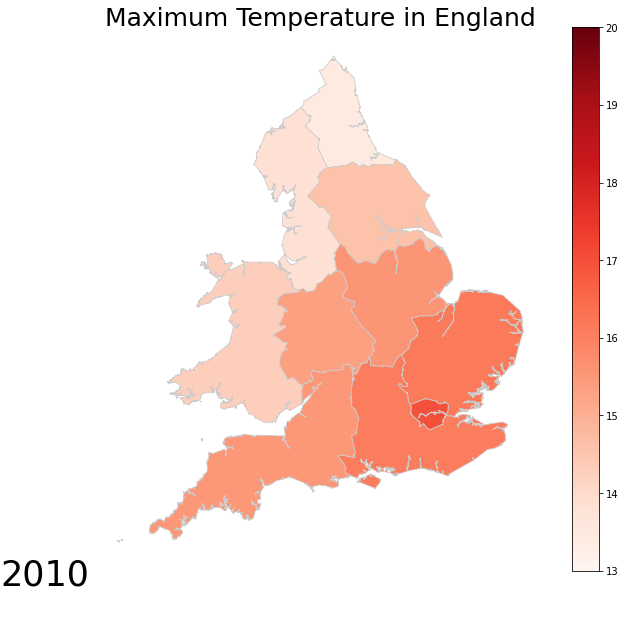

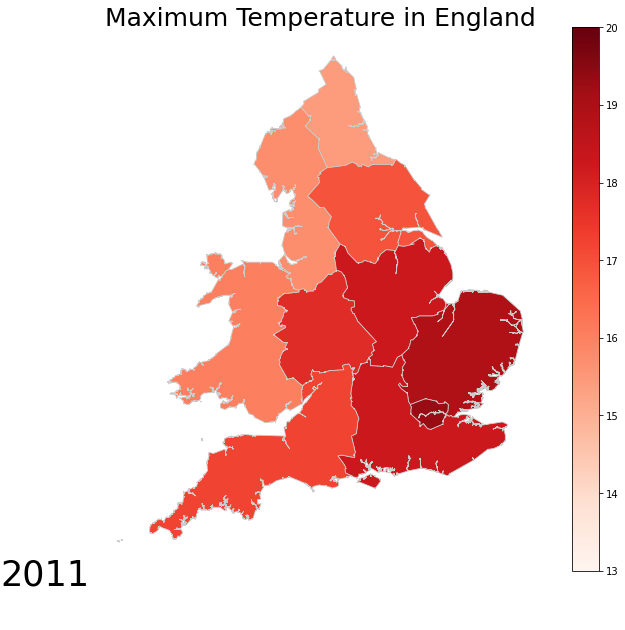

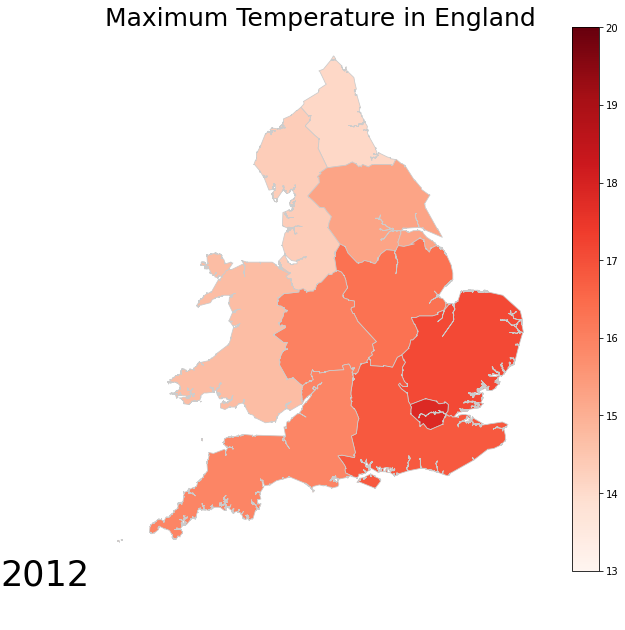

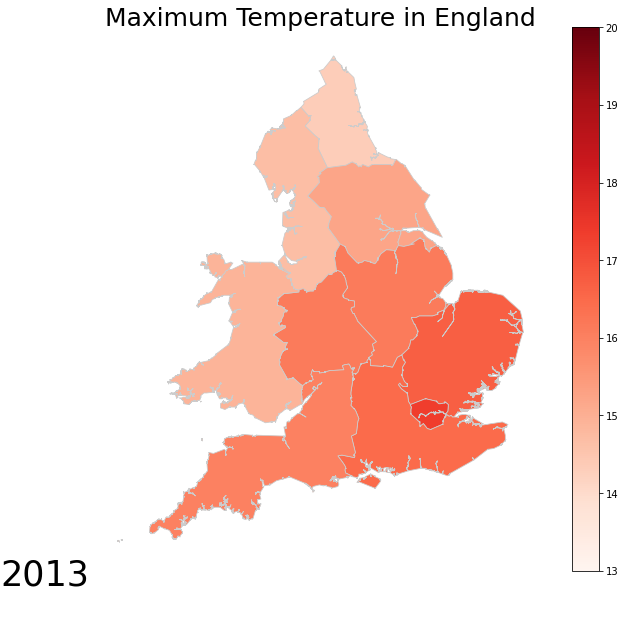

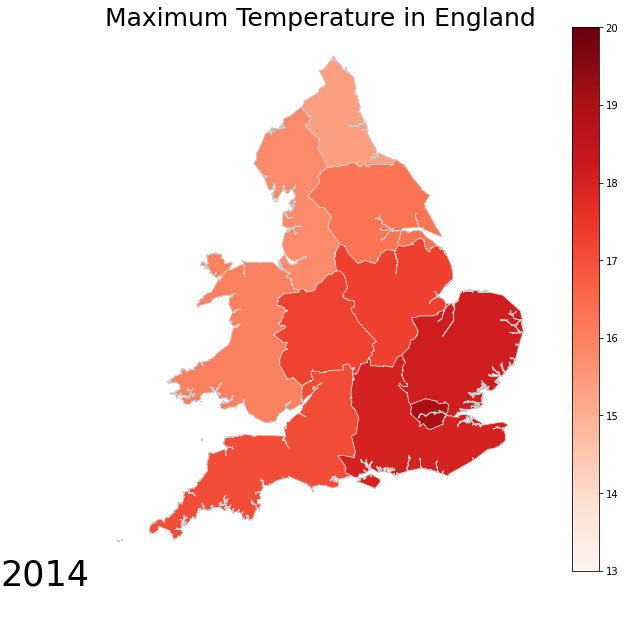

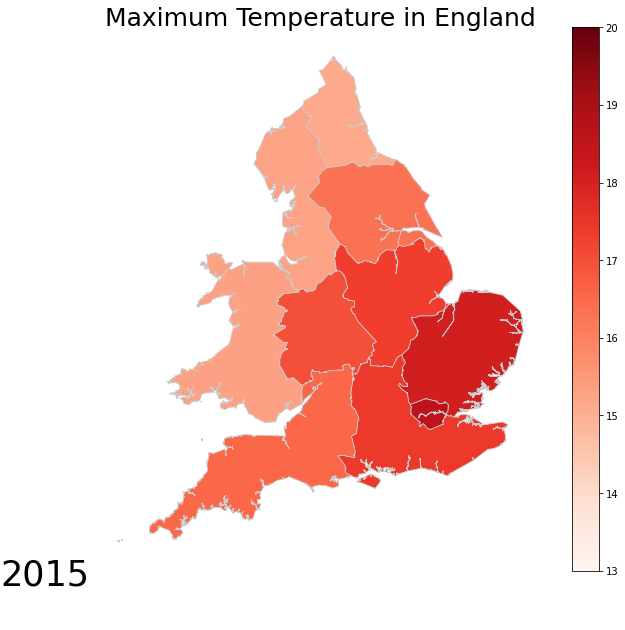

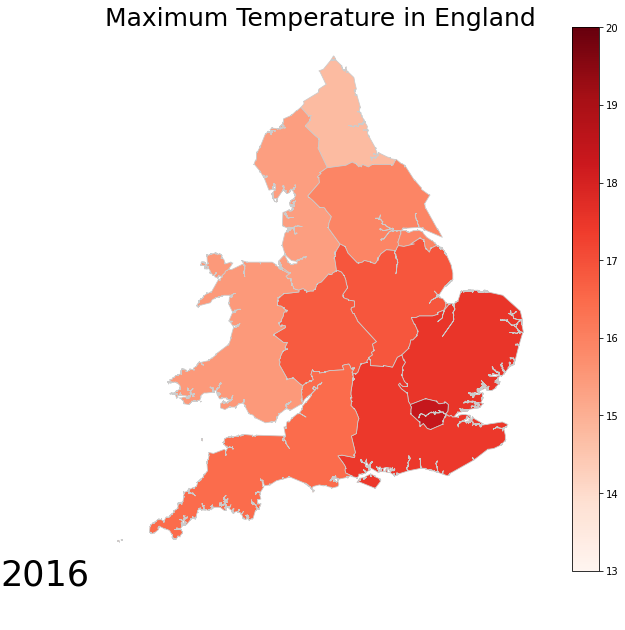

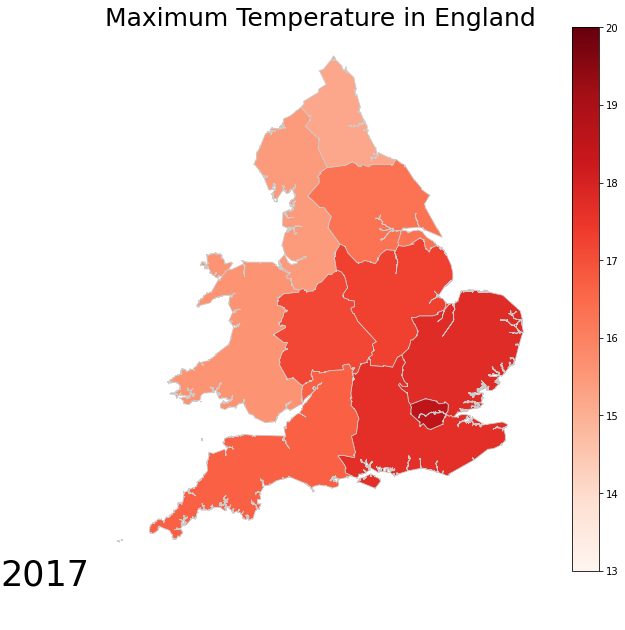

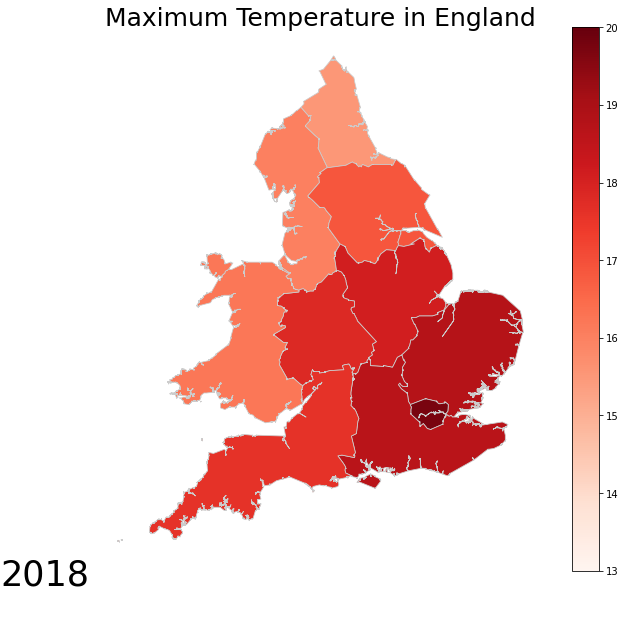

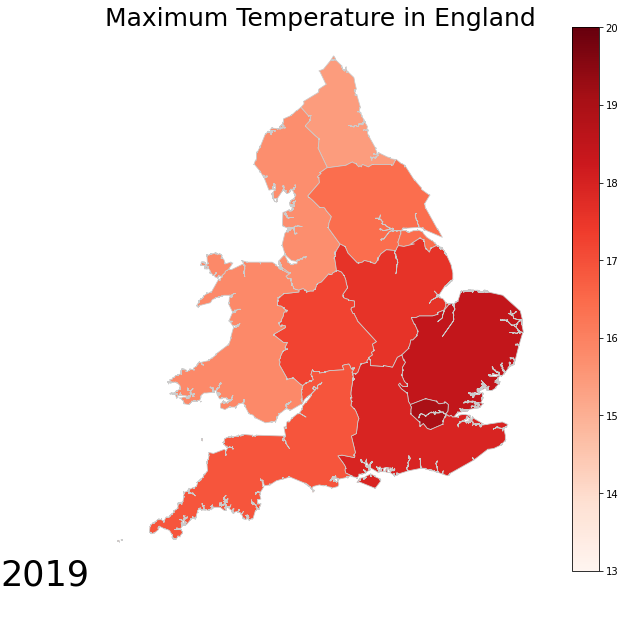

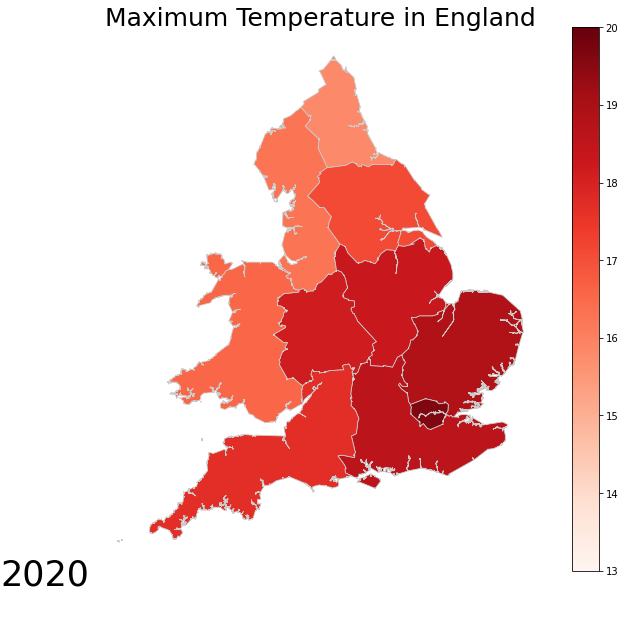

In [20]:
for year in list_of_years:
    fig = merged3.plot(column=year, cmap='Reds', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
    legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    fig.axis('off')
    fig.set_title('Maximum Temperature in England', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    fig.annotate(year,
            xy=(0, 0.1), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)

In [21]:
final = pd.read_excel(r'C:\Users\ishaa\Downloads\final.xlsx')
final

Year Region_Name Region_Code  Week_No  Week_Date  Mortality        min  \
0     2019  North East   E12000001        1 2019-01-04        574  -2.511655   
1     2019  North East   E12000001        2 2019-01-11        643  -0.358468   
2     2019  North East   E12000001        3 2019-01-18        627  -3.949547   
3     2019  North East   E12000001        4 2019-01-25        640  -5.146210   
4     2019  North East   E12000001        5 2019-02-01        618  -7.396507   
...    ...         ...         ...      ...        ...        ...        ...   
5205  2010       Wales   W92000004       48 2010-12-03        651  -9.397873   
5206  2010       Wales   W92000004       49 2010-12-10        695  -7.440589   
5207  2010       Wales   W92000004       50 2010-12-17        690  -4.096472   
5208  2010       Wales   W92000004       51 2010-12-24        751 -10.340289   
5209  2010       Wales   W92000004       52 2010-12-31        707  -9.946948   

            max Total_population  
0     10.670487        2,669,941  
1     10.641886        2,669,941  
2      9.949347        2,669,941  
3     10.009549        2,669,941  
4      8.452167        2,669,941  
...         ...              ...  
5205   2.968569        3,049,971  
5206   6.491239        3,049,971  
5207   7.057455        3,049,971  
5208   0.573784        3,049,971  
5209   7.991576        3,049,971  

[5210 rows x 9 columns]

C:\Users\ishaa\anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mortality in Wales (2010-2020)')

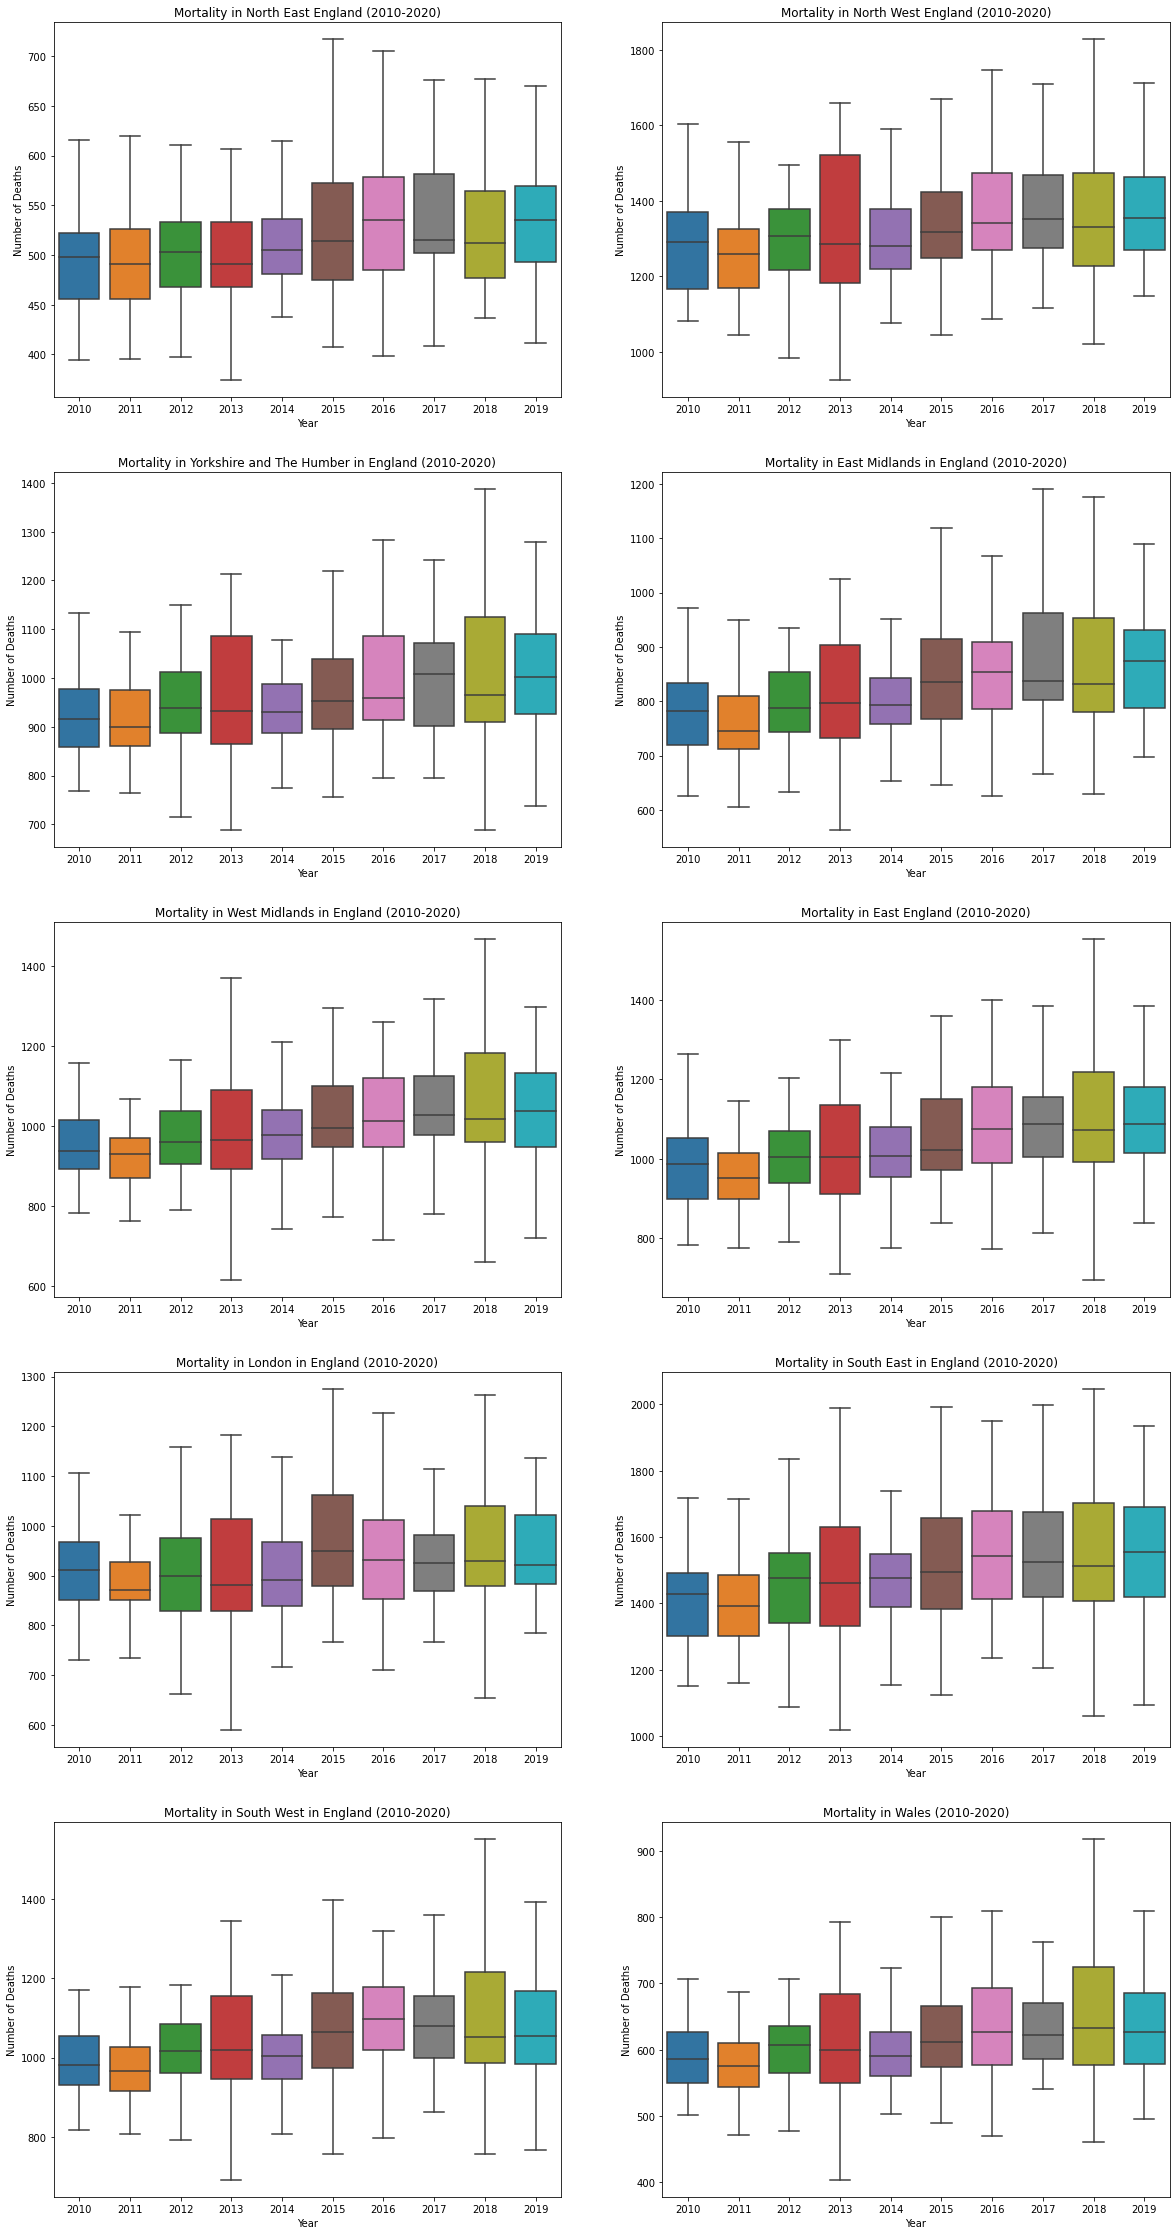

In [22]:
fig, ax = plt.subplots(5,2, figsize=(20,40))

North_East = final.loc[final['Region_Name']=='North East']
fig1= sns.boxplot(North_East['Year'], North_East['Mortality'], ax=ax[0,0], showfliers= False)
fig1.set_ylabel(ylabel = 'Number of Deaths')
fig1.set_title('Mortality in North East England (2010-2020)')

North_West = final.loc[final['Region_Name']=='North West']
fig2 = sns.boxplot(x=North_West['Year'], y=North_West['Mortality'], ax=ax[0,1], showfliers= False)
fig2.set_ylabel(ylabel = 'Number of Deaths')
fig2.set_title('Mortality in North West England (2010-2020)')

Yorkshire= final.loc[final['Region_Name']=='Yorkshire and The Humber']
fig3 = sns.boxplot(x=Yorkshire['Year'], y=Yorkshire['Mortality'], ax=ax[1,0], showfliers= False)
fig3.set_ylabel(ylabel = 'Number of Deaths')
fig3.set_title('Mortality in Yorkshire and The Humber in England (2010-2020)')

East_Midlands= final.loc[final['Region_Name']=='East Midlands']
fig4 = sns.boxplot(x=East_Midlands['Year'], y=East_Midlands['Mortality'], ax=ax[1,1], showfliers= False)
fig4.set_ylabel(ylabel = 'Number of Deaths')
fig4.set_title('Mortality in East Midlands in England (2010-2020)')

West_Midlands= final.loc[final['Region_Name']=='West Midlands']
fig5 = sns.boxplot(x=West_Midlands['Year'], y=West_Midlands['Mortality'], ax=ax[2,0], showfliers= False)
fig5.set_ylabel(ylabel = 'Number of Deaths')
fig5.set_title('Mortality in West Midlands in England (2010-2020)')

East= final.loc[final['Region_Name']=='East']
fig6 = sns.boxplot(x=East['Year'], y=East['Mortality'], ax=ax[2,1], showfliers= False)
fig6.set_ylabel(ylabel = 'Number of Deaths')
fig6.set_title('Mortality in East England (2010-2020)')

London= final.loc[final['Region_Name']=='London']
fig7 = sns.boxplot(x=London['Year'], y=London['Mortality'], ax=ax[3,0], showfliers= False)
fig7.set_ylabel(ylabel = 'Number of Deaths')
fig7.set_title('Mortality in London in England (2010-2020)')

South_East= final.loc[final['Region_Name']=='South East']
fig8 = sns.boxplot(x=South_East['Year'], y=South_East['Mortality'], ax=ax[3,1], showfliers= False)
fig8.set_ylabel(ylabel = 'Number of Deaths')
fig8.set_title('Mortality in South East in England (2010-2020)')

South_West= final.loc[final['Region_Name']=='South West']
fig9 = sns.boxplot(x=South_West['Year'], y=South_West['Mortality'], ax=ax[4,0], showfliers= False)
fig9.set_ylabel(ylabel = 'Number of Deaths')
fig9.set_title('Mortality in South West in England (2010-2020)')

Wales= final.loc[final['Region_Name']=='Wales']
fig10 = sns.boxplot(x=Wales['Year'], y=Wales['Mortality'], ax=ax[4,1], showfliers= False)
fig10.set_ylabel(ylabel = 'Number of Deaths')
fig10.set_title('Mortality in Wales (2010-2020)')

In [23]:
list_of_years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
vmin, vmax = 450, 1800
i=0

In [24]:
final2 = final.pivot_table('Mortality', ['Region_Name'], 'Year')
final2.rename({'Yorkshire and The Humber':'Yorkshire and the Humber'}, inplace = True)
final2['Region']= final2.index

In [25]:
merged4 = new.set_index('rgn19nm').join(final2.set_index('Region'))
merged4.reset_index()
merged4['Region_Name']=merged4.index

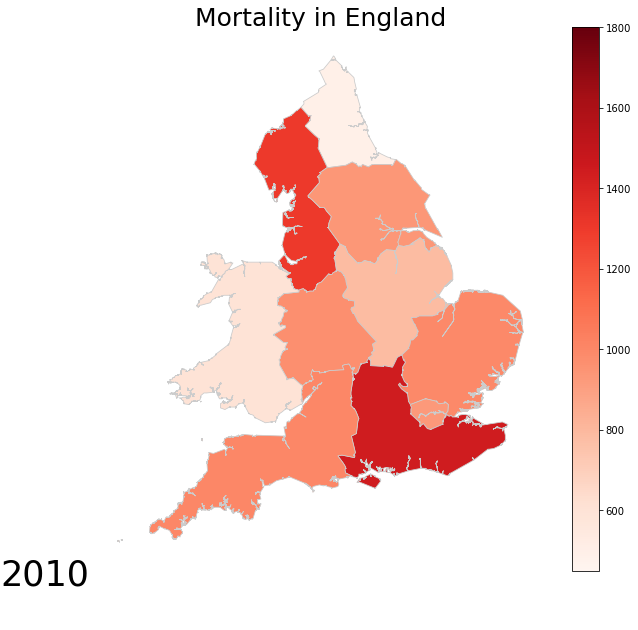

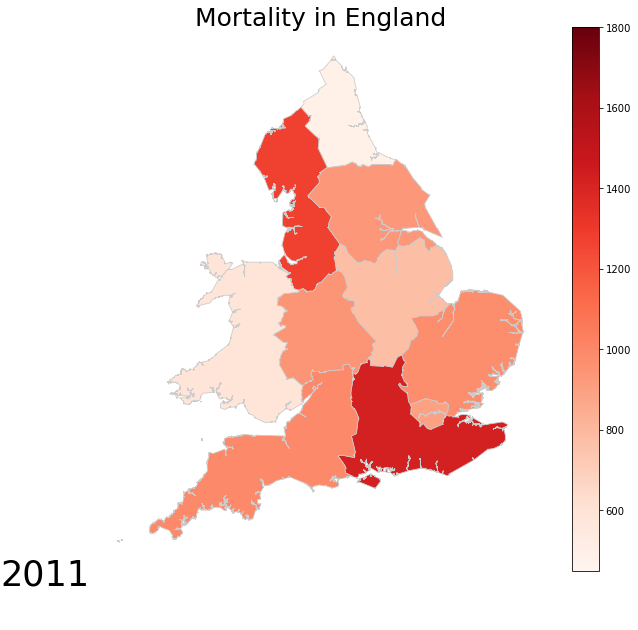

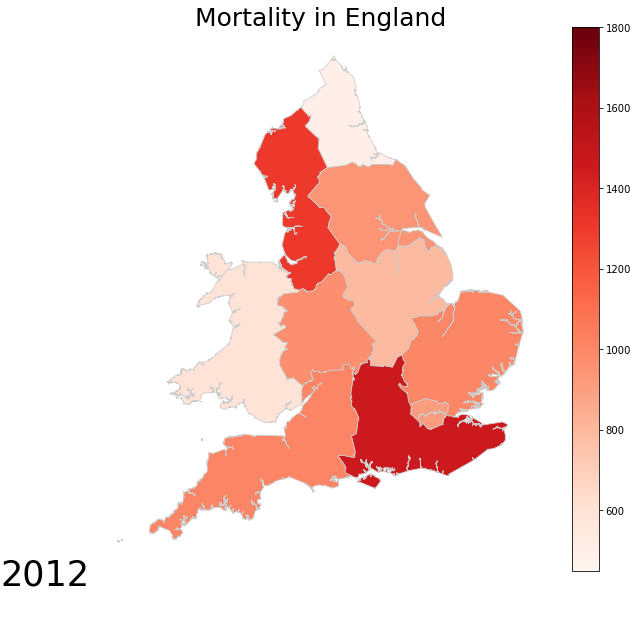

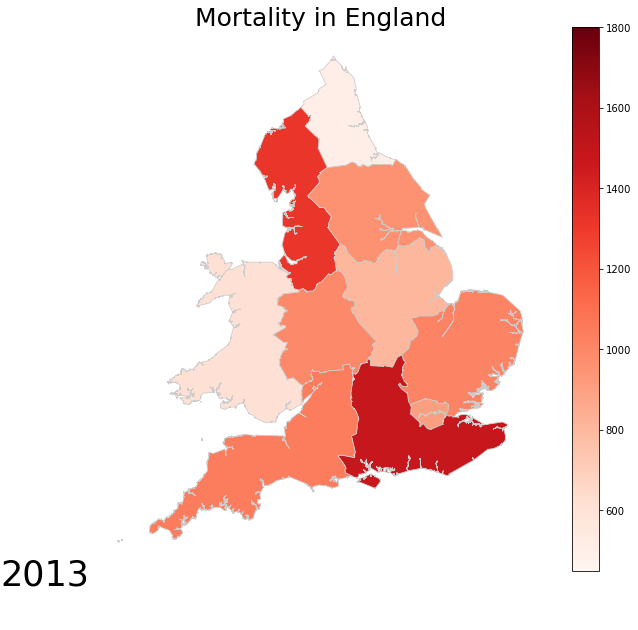

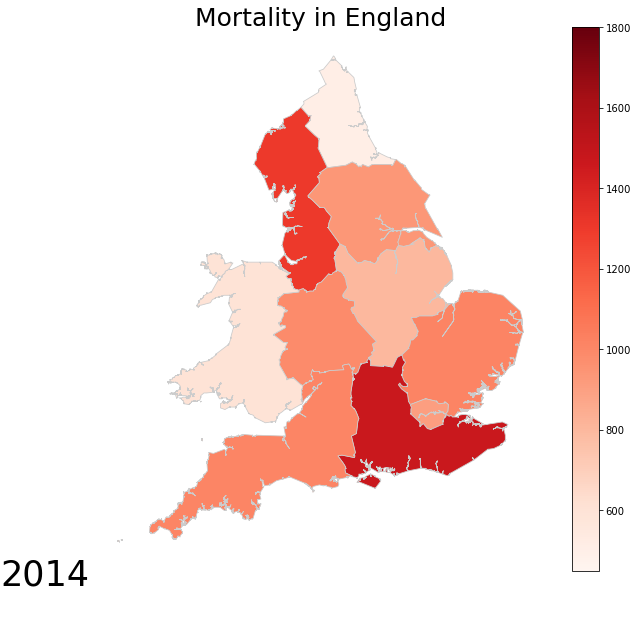

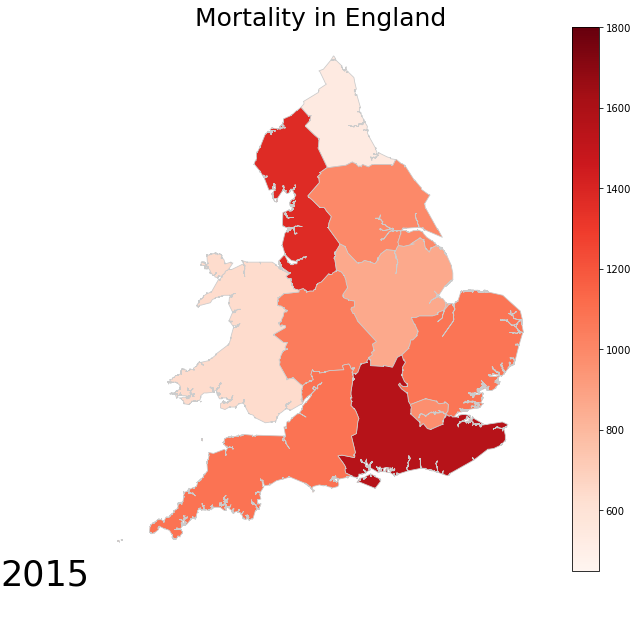

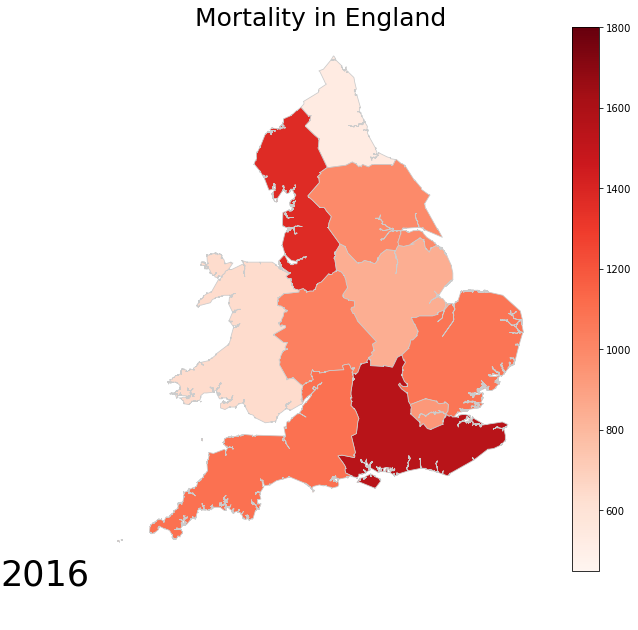

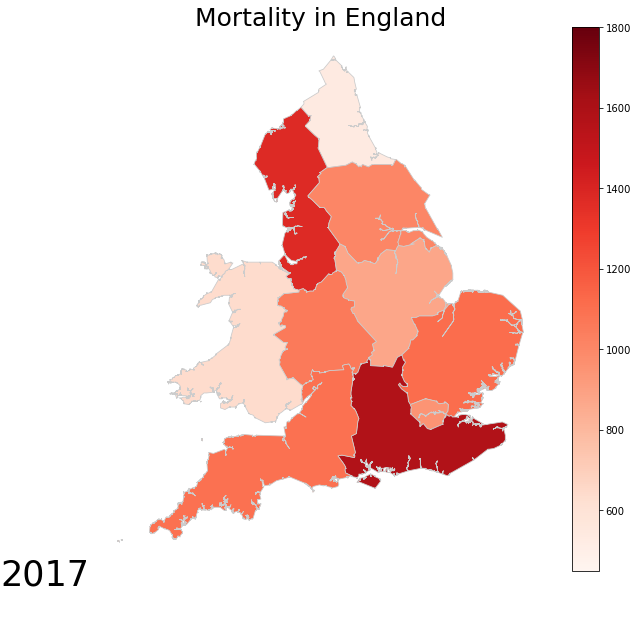

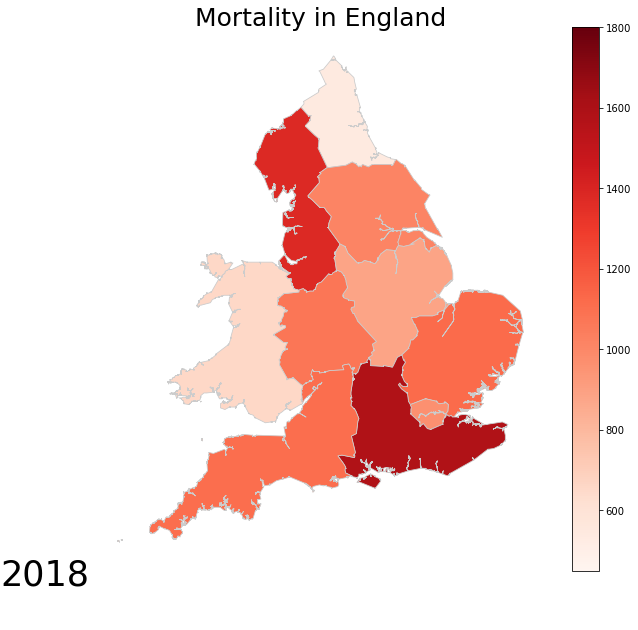

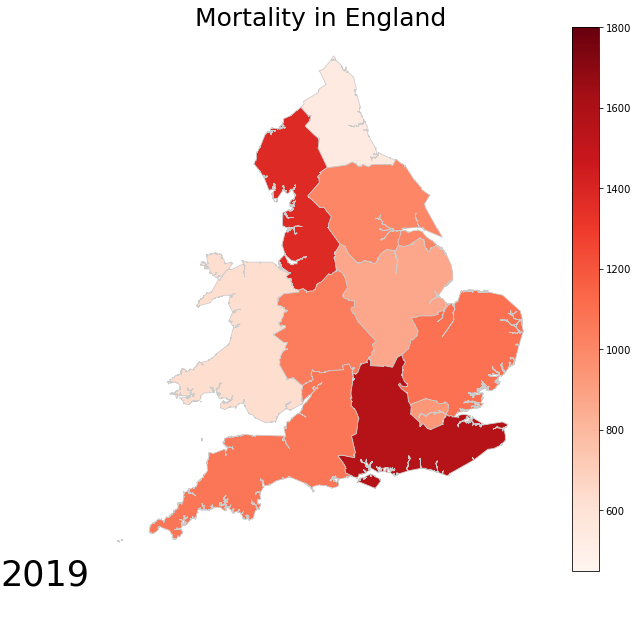

In [26]:
for year in list_of_years:
    fig = merged4.plot(column=year, cmap='Reds', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
    legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    fig.axis('off')
    fig.set_title('Mortality in England', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    fig.annotate(year,
            xy=(0, 0.1), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)